# EasyVisa Project

## Context:

Business communities in the United States are facing high demand for human resources, but one of the constant challenges is identifying and attracting the right talent, which is perhaps the most important element in remaining competitive. Companies in the United States look for hard-working, talented, and qualified individuals both locally as well as abroad.

The Immigration and Nationality Act (INA) of the US permits foreign workers to come to the United States to work on either a temporary or permanent basis. The act also protects US workers against adverse impacts on their wages or working conditions by ensuring US employers' compliance with statutory requirements when they hire foreign workers to fill workforce shortages. The immigration programs are administered by the Office of Foreign Labor Certification (OFLC).

OFLC processes job certification applications for employers seeking to bring foreign workers into the United States and grants certifications in those cases where employers can demonstrate that there are not sufficient US workers available to perform the work at wages that meet or exceed the wage paid for the occupation in the area of intended employment.

## Objective:

In FY 2016, the OFLC processed 775,979 employer applications for 1,699,957 positions for temporary and permanent labor certifications. This was a nine percent increase in the overall number of processed applications from the previous year. The process of reviewing every case is becoming a tedious task as the number of applicants is increasing every year.

The increasing number of applicants every year calls for a Machine Learning based solution that can help in shortlisting the candidates having higher chances of VISA approval. OFLC has hired your firm EasyVisa for data-driven solutions. You as a data scientist have to analyze the data provided and, with the help of a classification model:

* Facilitate the process of visa approvals.
* Recommend a suitable profile for the applicants for whom the visa should be certified or denied based on the drivers that significantly influence the case status. 


## Data Description

The data contains the different attributes of the employee and the employer. The detailed data dictionary is given below.

* case_id: ID of each visa application
* continent: Information of continent the employee
* education_of_employee: Information of education of the employee
* has_job_experience: Does the employee has any job experience? Y= Yes; N = No
* requires_job_training: Does the employee require any job training? Y = Yes; N = No 
* no_of_employees: Number of employees in the employer's company
* yr_of_estab: Year in which the employer's company was established
* region_of_employment: Information of foreign worker's intended region of employment in the US.
* prevailing_wage:  Average wage paid to similarly employed workers in a specific occupation in the area of intended employment. The purpose of the prevailing wage is to ensure that the foreign worker is not underpaid compared to other workers offering the same or similar service in the same area of employment. 
* unit_of_wage: Unit of prevailing wage. Values include Hourly, Weekly, Monthly, and Yearly.
* full_time_position: Is the position of work full-time? Y = Full Time Position; N = Part Time Position
* case_status:  Flag indicating if the Visa was certified or denied

## Importing necessary libraries and data

In [97]:
# Library to suppress warnings or deprecation notes 
import warnings
warnings.filterwarnings('ignore')

# Libraries to help with reading and manipulating data
import numpy as np
import pandas as pd

# Libraries to help with data visualization
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

# Libraries to split data, impute missing values 
from sklearn.model_selection import train_test_split
from sklearn.impute import SimpleImputer

# Libraries to import decision tree classifier and different ensemble classifiers
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier, GradientBoostingClassifier
from xgboost import XGBClassifier
from sklearn.ensemble import StackingClassifier
from sklearn.tree import DecisionTreeClassifier

# Libtune to tune model, get different metric scores
from sklearn import metrics
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score, precision_score, recall_score, f1_score, roc_auc_score
from sklearn.model_selection import GridSearchCV

In [98]:
ev = pd.read_csv('EasyVisa.csv')
#using 'read_csv()' from 'pandas' dataframe.

In [99]:
# copying data to another varaible to avoid any changes to original data
vis = ev.copy()

In [100]:
vis.head()

,case_id,continent,education_of_employee,has_job_experience,requires_job_training,no_of_employees,yr_of_estab,region_of_employment,prevailing_wage,unit_of_wage,full_time_position,case_status
0,EZYV01,Asia,High School,N,N,14513,2007,West,592.2029,Hour,Y,Denied
1,EZYV02,Asia,Master's,Y,N,2412,2002,Northeast,83425.6500,Year,Y,Certified
2,EZYV03,Asia,Bachelor's,N,Y,44444,2008,West,122996.8600,Year,Y,Denied
3,EZYV04,Asia,Bachelor's,N,N,98,1897,West,83434.0300,Year,Y,Denied
4,EZYV05,Africa,Master's,Y,N,1082,2005,South,149907.3900,Year,Y,Certified


## Data Overview

- Observations
- Sanity checks

In [102]:
vis.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25480 entries, 0 to 25479
Data columns (total 12 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   case_id                25480 non-null  object 
 1   continent              25480 non-null  object 
 2   education_of_employee  25480 non-null  object 
 3   has_job_experience     25480 non-null  object 
 4   requires_job_training  25480 non-null  object 
 5   no_of_employees        25480 non-null  int64  
 6   yr_of_estab            25480 non-null  int64  
 7   region_of_employment   25480 non-null  object 
 8   prevailing_wage        25480 non-null  float64
 9   unit_of_wage           25480 non-null  object 
 10  full_time_position     25480 non-null  object 
 11  case_status            25480 non-null  object 
dtypes: float64(1), int64(2), object(9)
memory usage: 2.3+ MB


* We have 9 'object' data-type variables, 2 'int64' data-type variables and only 1 'float' type variable.

In [103]:
vis.duplicated().sum()

0

* No duplicated values exists for this dataset.

In [104]:
vis.isnull().sum()

case_id                  0
continent                0
education_of_employee    0
has_job_experience       0
requires_job_training    0
no_of_employees          0
yr_of_estab              0
region_of_employment     0
prevailing_wage          0
unit_of_wage             0
full_time_position       0
case_status              0
dtype: int64

* No null values were found, which is a great sign before any analysis.

In [105]:
vis.shape

(25480, 12)

* There are 25,480 observations and 12 columns in the dataset

In [106]:
vis.describe().T

,count,mean,std,min,25%,50%,75%,max
no_of_employees,25480.0,5667.043210,22877.928848,-26.0000,1022.00,2109.00,3504.0000,602069.00
yr_of_estab,25480.0,1979.409929,42.366929,1800.0000,1976.00,1997.00,2005.0000,2016.00
prevailing_wage,25480.0,74455.814592,52815.942327,2.1367,34015.48,70308.21,107735.5125,319210.27


* The output is only telling us the summary of the 'integer' and 'float' dtype variables which, includes 'no_of_employees', 'yr_of_estab' and 'prevailing_wage'.

Statistical summary of all the numerical variables only

## Exploratory Data Analysis (EDA)

- EDA is an important part of any project involving data.
- It is important to investigate and understand the data better before building a model with it.
- A few questions have been mentioned below which will help you approach the analysis in the right manner and generate insights from the data.
- A thorough analysis of the data, in addition to the questions mentioned below, should be done.

## Univariate Analysis ##

In [107]:
# function to plot a boxplot and a histogram along the same scale.


def histogram_boxplot(data, feature, figsize=(12, 7), kde=False, bins=None):
    """
    Boxplot and histogram combined

    data: dataframe
    feature: dataframe column
    figsize: size of figure (default (12,7))
    kde: whether to show the density curve (default False)
    bins: number of bins for histogram (default None)
    """
    f2, (ax_box2, ax_hist2) = plt.subplots(
        nrows=2,  # Number of rows of the subplot grid= 2
        sharex=True,  # x-axis will be shared among all subplots
        gridspec_kw={"height_ratios": (0.25, 0.75)},
        figsize=figsize,
    )  # creating the 2 subplots
    sns.boxplot(
        data=data, x=feature, ax=ax_box2, showmeans=True, color="violet"
    )  # boxplot will be created and a triangle will indicate the mean value of the column
    sns.histplot(
        data=data, x=feature, kde=kde, ax=ax_hist2, bins=bins
    ) if bins else sns.histplot(
        data=data, x=feature, kde=kde, ax=ax_hist2
    )  # For histogram
    ax_hist2.axvline(
        data[feature].mean(), color="green", linestyle="--"
    )  # Add mean to the histogram
    ax_hist2.axvline(
        data[feature].median(), color="black", linestyle="-"
    )  # Add median to the histogram

In [108]:
# function to create labeled barplots


def labeled_barplot(data, feature, perc=False, n=None):
    """
    Barplot with percentage at the top

    data: dataframe
    feature: dataframe column
    perc: whether to display percentages instead of count (default is False)
    n: displays the top n category levels (default is None, i.e., display all levels)
    """

    total = len(data[feature])  # length of the column
    count = data[feature].nunique()
    if n is None:
        plt.figure(figsize=(count + 2, 6))
    else:
        plt.figure(figsize=(n + 2, 6))

    plt.xticks(rotation=90, fontsize=15)
    ax = sns.countplot(
        data=data,
        x=feature,
        palette="Paired",
        order=data[feature].value_counts().index[:n],
    )

    for p in ax.patches:
        if perc == True:
            label = "{:.1f}%".format(
                100 * p.get_height() / total
            )  # percentage of each class of the category
        else:
            label = p.get_height()  # count of each level of the category

        x = p.get_x() + p.get_width() / 2  # width of the plot
        y = p.get_height()  # height of the plot

        ax.annotate(
            label,
            (x, y),
            ha="center",
            va="center",
            size=12,
            xytext=(0, 5),
            textcoords="offset points",
        )  # annotate the percentage

    plt.show()  # show the plot

In [109]:
# function to create labeled barplots


def labeled_barplot_colored(data, feature, perc=False, n=None):
    """
    Barplot with percentage at the top

    data: dataframe
    feature: dataframe column
    perc: whether to display percentages instead of count (default is False)
    n: displays the top n category levels (default is None, i.e., display all levels)
    """

    total = len(data[feature])  # length of the column
    count = data[feature].nunique()
    if n is None:
        plt.figure(figsize=(count + 2, 6))
    else:
        plt.figure(figsize=(n + 2, 6))

    plt.xticks(rotation=0, fontsize=15)
    ax = sns.countplot(
        data=data,
        x=feature,
        palette="bright",
        order=data[feature].value_counts().index[:n],
    )

    for p in ax.patches:
        if perc == True:
            label = "{:.1f}%".format(
                100 * p.get_height() / total
            )  # percentage of each class of the category
        else:
            label = p.get_height()  # count of each level of the category

        x = p.get_x() + p.get_width() / 2  # width of the plot
        y = p.get_height()  # height of the plot

        ax.annotate(
            label,
            (x, y),
            ha="center",
            va="center",
            size=12,
            xytext=(0, 5),
            textcoords="offset points",
        )  # annotate the percentage

    plt.show()  # show the plot

In [110]:
def labeled_barplot2(data, feature, feature_2, order, perc=False, n=None):
    """
    Barplot with percentage at the top

    data: dataframe
    feature: dataframe column
    feature_2: dataframe column
    perc: whether to display percentages instead of count (default is False)
    n: displays the top n category levels (default is None, i.e., display all levels)
    """

    total = len(data[feature])  # length of the column
    count = data[feature].nunique()
    if n is None:
        plt.figure(figsize=(count + 1, 5))
    else:
        plt.figure(figsize=(n + 1, 5))
        
    ax = sns.countplot(
        data=data,
        x=feature,
        palette="bright",
        order=order,
        hue=feature_2,
    )

    for p in ax.patches:
        if perc == True:
            label = "{:.1f}%".format(
                100 * p.get_height() / total
            )  # percentage of each class of the category
        else:
            label = p.get_height()  # count of each level of the category

        x = p.get_x() + p.get_width() / 2  # width of the plot
        y = p.get_height()  # height of the plot

        ax.annotate(
            label,
            (x, y),
            ha="center",
            va="center",
            size=9,
            xytext=(0, 5),
            textcoords="offset points"
        )  # annotate the percentage

    plt.show()  # show the plot

## Year of Establishment

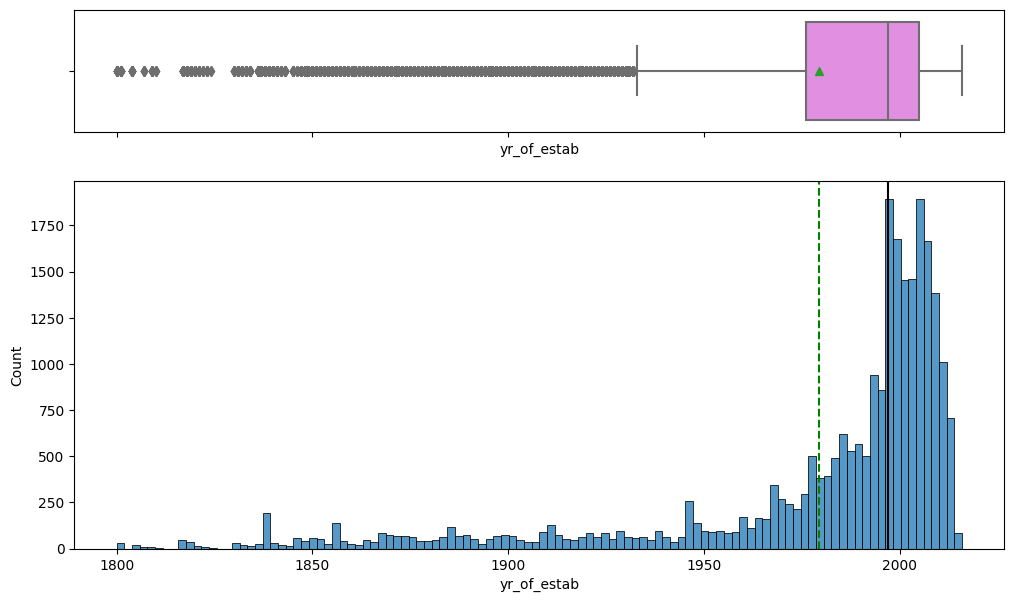

In [111]:
histogram_boxplot(vis, 'yr_of_estab')


* Most of the companies that the candidates showed interest/ applied have been established during the late 90's, early 2000's and late 2000's.

## Number of employees

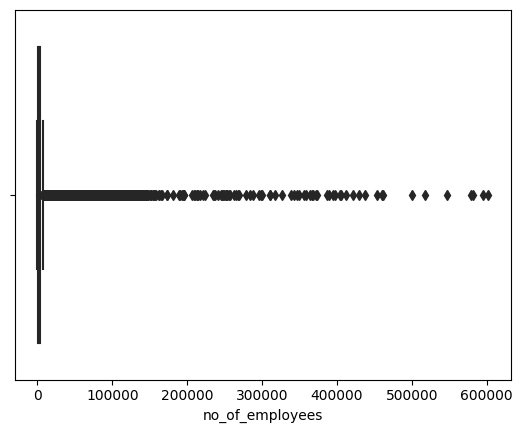

In [112]:
sns.boxplot(data = vis, x = 'no_of_employees',color = 'g');
#seaborn boxplot will generate a boxplot of the color green

* Those with higher education may want to travel abroad for a well-paid job. Does education play a role in Visa certification? 

## Education status of the emoloyees

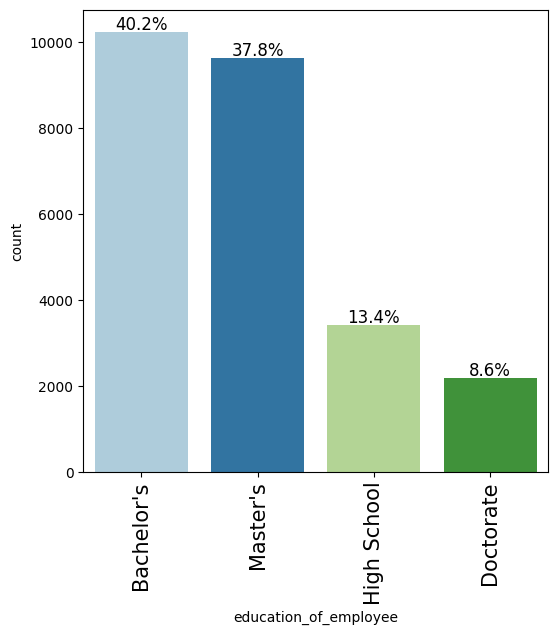

In [113]:
labeled_barplot(vis, 'education_of_employee',perc = True)
#user defined labeled_barplot will generate a barplot with x as 'education_of_employee'

Yes they do actually. We can see that the foreign workers while at their bachelor's stage are the most popular among the candidates who are most likely to apply.

## Prior Job Experience

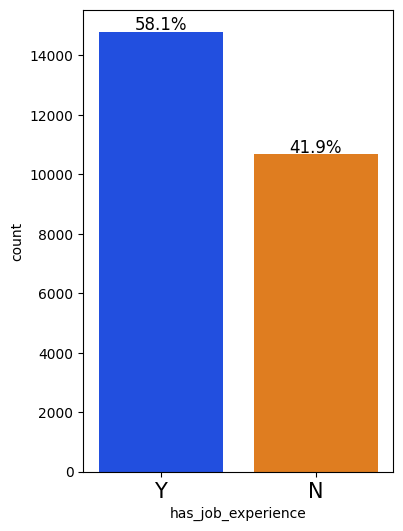

In [114]:
labeled_barplot_colored(vis, 'has_job_experience',perc = True)
#user defined labeled_barplot_colored will generate a barplot with x as 'has_job_experience' with some bright colored bars

* We can see that ~58.1% of the people does have job experience. 

## Requires job training

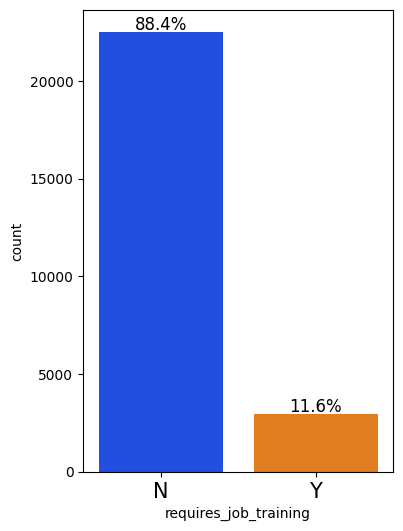

In [115]:
labeled_barplot_colored(vis, 'requires_job_training',perc = True)
#user defined labeled_barplot will generate a barplot with x as 'requires_job_training' with some bright colored bars

* ~88.4% of the candidates don't need any type of job training. Which is almost most of the overall candidates


* How does the visa status vary across different continents? 

## Continents

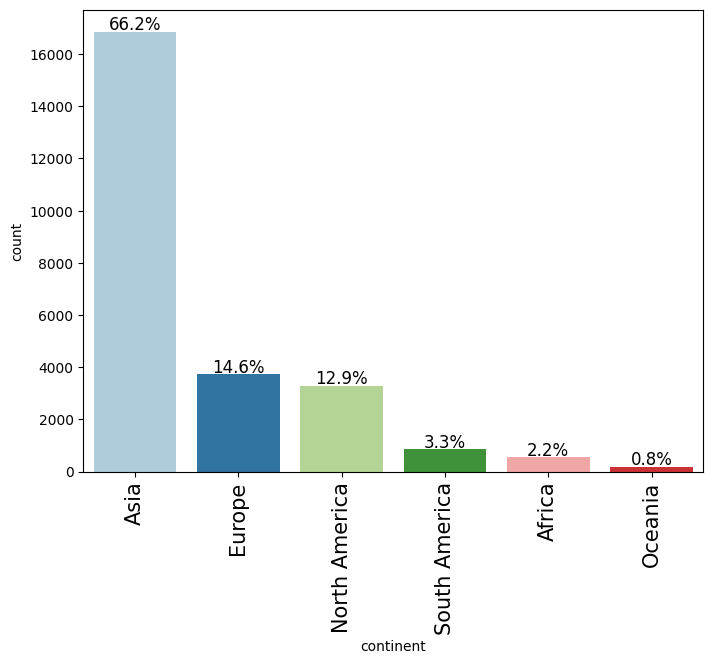

In [116]:
labeled_barplot(vis, 'continent',perc = True)
#user defined labeled_barplot will generate a barplot with x as 'continent'

* We can see that the applicants from Asia is huge. Huge number of Asians while at their bachelor's apply for the open-available opportunities at the United States. Also, if the data could also be cross-checked on which parts of Asia are they coming from then, we could have a more precise understanding.

## Region of Employment

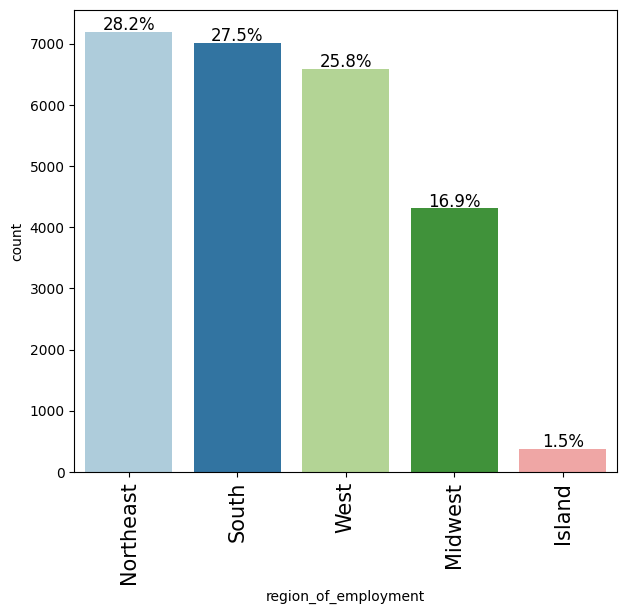

In [117]:
labeled_barplot(vis, 'region_of_employment',perc = True)
#the user defined labeled barplot function will generate bargraphs with x.ticks() == 90 degrees

* The most popular region of employement for candidates is 'Northeast' ~28.2% and 'South' ~27.5% as the second most popular region.

## Prevailing wage 

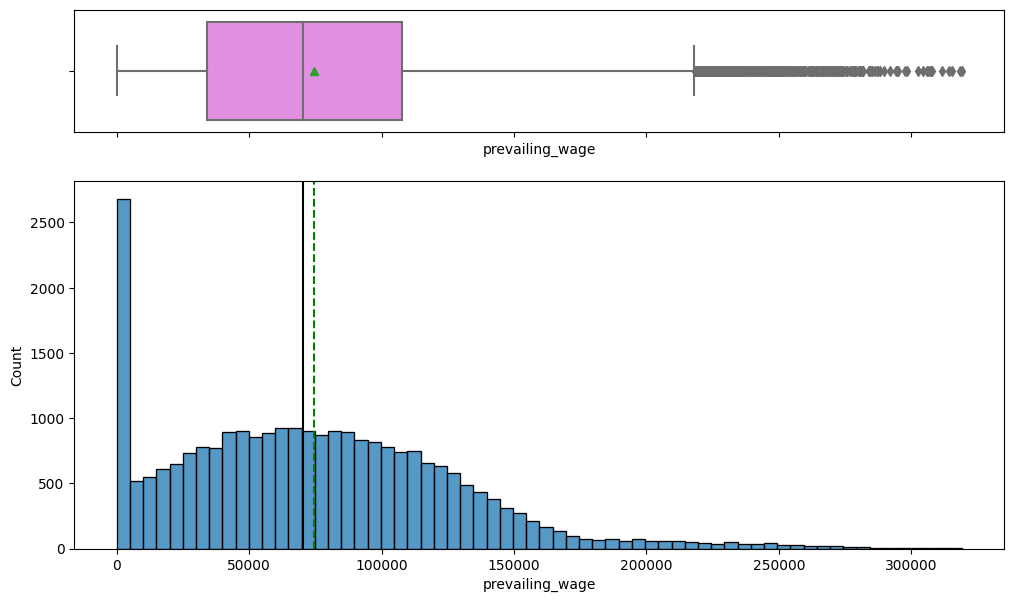

In [118]:
histogram_boxplot(vis, 'prevailing_wage')
#the user defined function histogram_boxplot will generate a histogram and boxplot for the variable prevailing wage 


* The average prevailing wage is between $50,000< x <$100,000

## Wage Unit

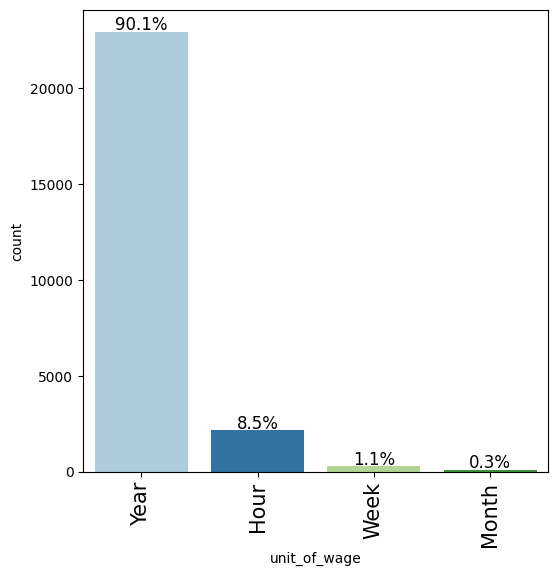

In [119]:
labeled_barplot(vis, 'unit_of_wage',perc = True)
#user-defined function labeled_barplot will use vis as the main data
#x in this case is 'unit_of_wage' where x.ticks() rotated 90 degrees

* The popular unit wage among the candidates who applied is 'yearly' ~90.1%

## Full-Time Positions

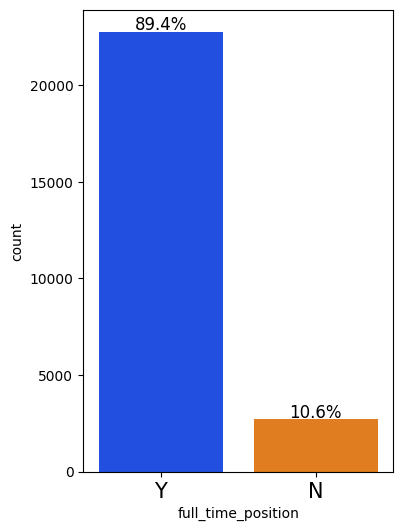

In [120]:
labeled_barplot_colored(vis, 'full_time_position',perc = True)
#the user defined 'labeled_barplot_colored() will generate barplots with colored bars 
#the x parameter is 'full_time_position' and percentage parameter expects a boolean where 'True' is showing percentage and 'False' 

* Most candidates applied to full-time position ~89.4%.

## Case-Status

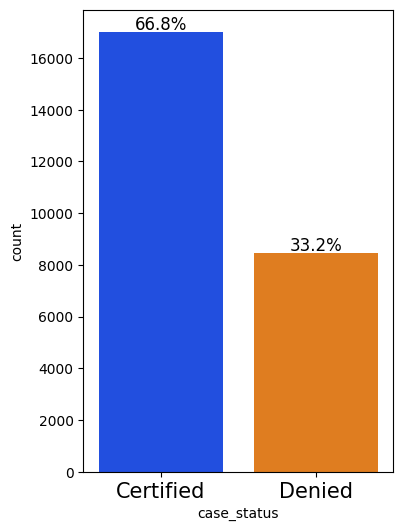

In [121]:
labeled_barplot_colored(vis, 'case_status',perc = True) 
#the user defined 'labeled_barplot_colored() will generate barplots with colored bars 
#the x parameter is 'case_status' and percentage parameter expects a boolean where 'True' is showing percentage and 'False' 

* Overall ~66.8% of the candidates recieved work-permit visa also ~33.2% failed to recieve one. 

* Experienced professionals might look abroad for opportunities to improve their lifestyles and career development. Does work experience influence visa status? 

## Bivariate analysis

# Job Experience Vs Case Status

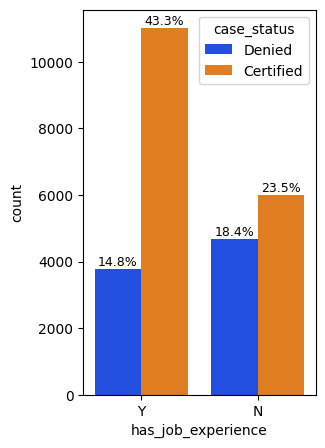

In [122]:
labeled_barplot2(vis,'has_job_experience','case_status', order=["Y","N"], perc=True)
#the user defined labeled_barplot2 will also show the percentages and will also add some bright colors 
##For the x it follow its order of the appeared values in the education_of_employee row.

* ~43.3% of the candidates having prior job experience visa cases had been certified where also, ~14.8% candidates having job experience were denied too. 
* The job experience plays a major role as we can see but, also sometimes we have seen that only job experience wasn't enough in some cases.

# Education of Employee Vs Case Status

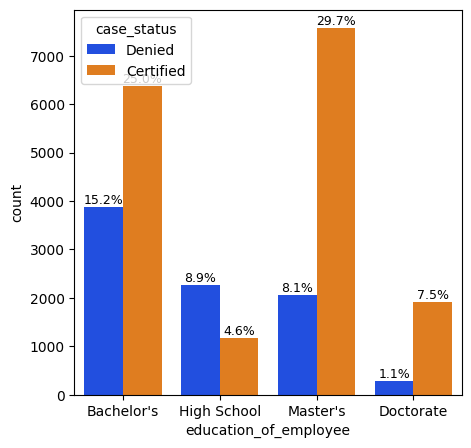

In [123]:
labeled_barplot2(vis,'education_of_employee','case_status', order=["Bachelor's","High School","Master's","Doctorate"], perc=True)
#the user defined labeled_barplot2 will also show the percentages and will also add some bright colors 
#For the x it follow its order of the appeared values in the education_of_employee row.

* In the United States, employees are paid at different intervals. Which pay unit is most likely to be certified for a visa? 

# Unit of Wage Vs Case Status

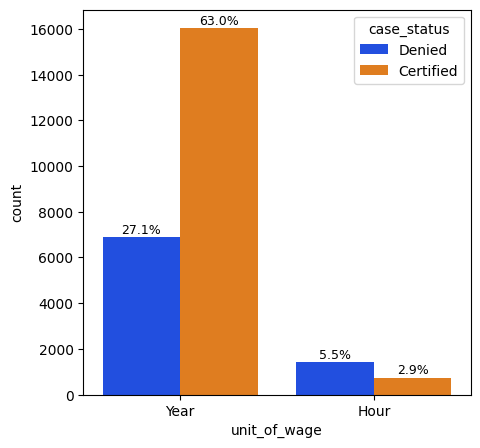

In [124]:
labeled_barplot2(vis,'unit_of_wage','case_status', order=["Year","Hour"], perc=True) 
# the labeled barplot2 will generate barplot with the percentages and a mix of some bright colors and the x.ticks() rotation being 0 degrees
# the 'order' parameter has followed the x == 'unit_of_wage' by 'year' and 'hour'

So, yearly paid employees are most popular among foreign workers.

 * The US government has established a prevailing wage to protect local talent and foreign workers. How does the visa status change with the prevailing wage?

# Case Status Vs Prevailing Wage

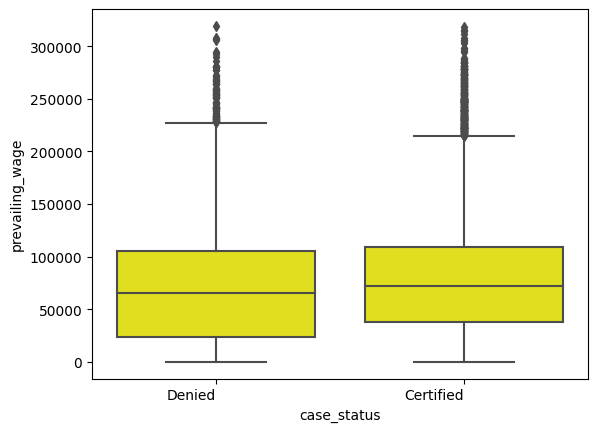

In [125]:
sns.boxplot(
    x='case_status',                         #takes 'case_status' as the x parameter and y as the 'prevailing wage'
    y='prevailing_wage',                     #seaborn.boxplot will generate a boxplot with the color yellow but, x and y labels hasn't been added
    data=vis,                            
    color='yellow')
plt.xticks(ha='right');

We see that the average prevailing wage among the certified visa's are more than the denied ones but, we also see that there are a lot of whiskers too. 

## Education of the employee Vs Has job experience

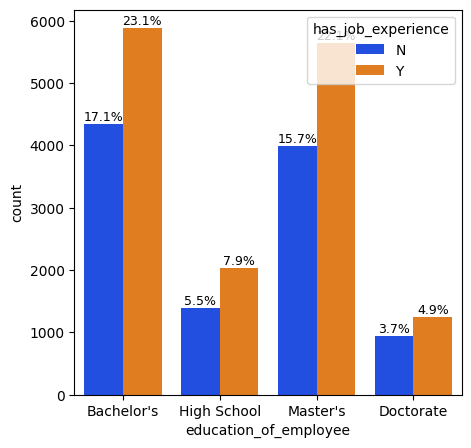

In [126]:
labeled_barplot2(vis,'education_of_employee','has_job_experience', order=["Bachelor's","High School","Master's","Doctorate"], perc=True)
#user-defined labled_barplot function is taking x == 'education_of_employee and y as 'has_job_training' in the parameter order by 'bachelor's','high school', 'masters' and doctorate.

## Education of the employee Vs Needs Job training

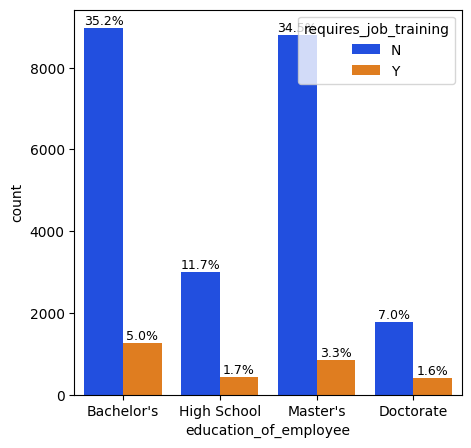

In [127]:
labeled_barplot2(vis,'education_of_employee','requires_job_training', order=["Bachelor's","High School","Master's","Doctorate"], perc=True)
#user-defined labled_barplot function is taking x == 'education_of_employee and y as 'requires_job_training' in the parameter order by 'bachelor's','high school', 'masters' and doctorate.

The candidates having Bachelor's has the highest percentage ~35.2% of not requiring job training.

## Region of Employment Vs Established Year

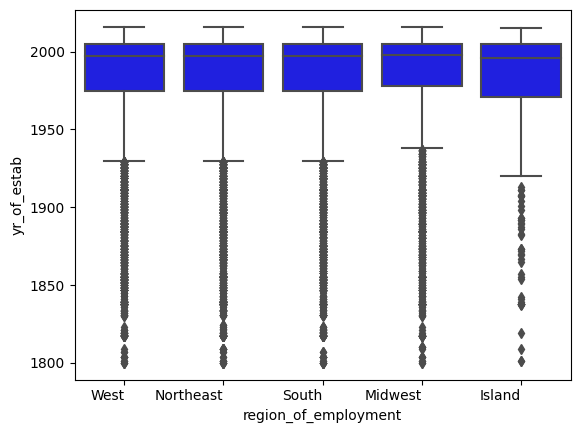

In [128]:
sns.boxplot(
    x='region_of_employment',                    #seaborn.boxplot will generate a boxplot 
    y='yr_of_estab',                             #by keeping x as the region of employement and y as the prevailing wage
    data=vis,                            
    color='blue')
plt.xticks(ha='right');

## Region of Employment Vs Prevailing Wage

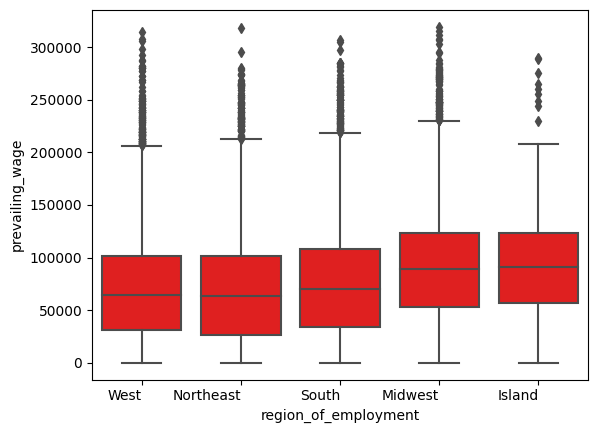

In [129]:
sns.boxplot(                                       #seaborn.boxplot will generate a boxplot 
                                                   #by keeping x as the region of employement and y as the prevailing wage
    x='region_of_employment', 
    y='prevailing_wage',                  
    data=vis,                            
    color='red')
plt.xticks(ha='right');

* The prevailing wage average is almost same on 'West', 'Northeast' and 'South' where 'Midwest' and 'Island' has the closest highest average among every region. But, we also see may whiskers which also tells that there are many very-high paying jobs which is far above the range.

## Region of Employment Vs Unit of Wage

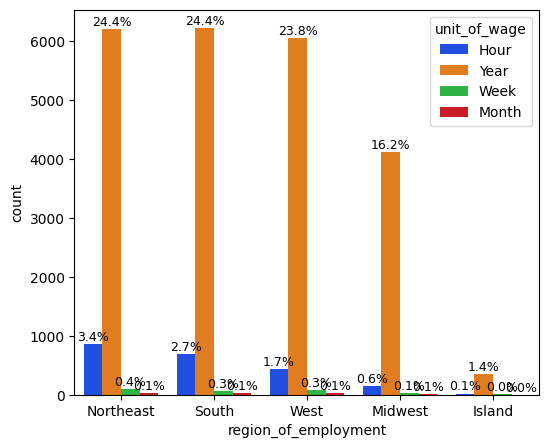

In [130]:
labeled_barplot2(vis,'region_of_employment','unit_of_wage', order=["Northeast","South","West","Midwest","Island"], perc=True)
#user-defined labled_barplot function is taking x == 'region_of_employment' and y as 'unit_of_wage' in the parameter order by "Northeast","South","West","Midwest" and "Island".

* At 'Northeast'(~24.4%) and 'South'(~24.4%) the most popular 'unit_of_wage' is 'year' basis and the next is the 'West' among the companies that the candidates hired/applied.

## Region of Employement vs Full time position

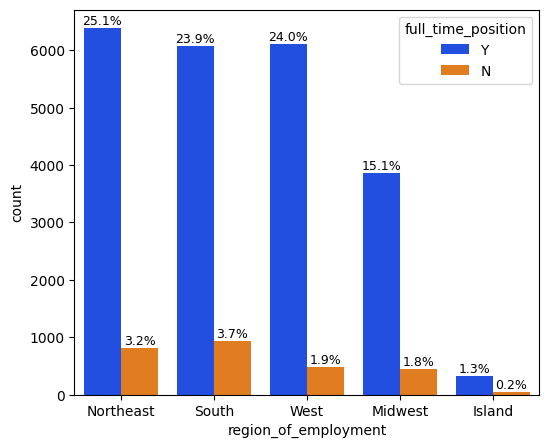

In [131]:
labeled_barplot2(vis,'region_of_employment','full_time_position', order=["Northeast","South","West","Midwest","Island"], perc=True)
#user-defined labled_barplot function is taking x == 'region_of_employment' and y as 'full_time_position' in the parameter order by "Northeast","South","West","Midwest" and "Island".

## Full Time Position Vs Case Status

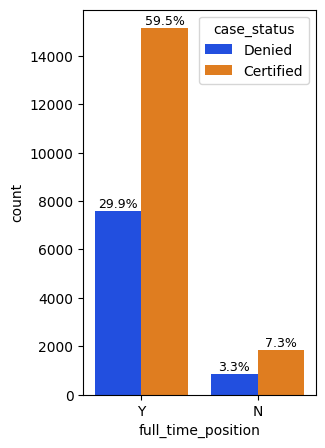

In [132]:
labeled_barplot2(vis,'full_time_position','case_status', order=["Y","N"], perc=True)
#user-defined labled_barplot function is taking x == 'full_time_position' and y as 'case_status' in the parameter order by "Y" and "N".

* ~59.5% of the full time applied/hired candidates have been granted the United States visa. But, also ~29.9% were denied.

## Full Time Position Vs Unit of Wage

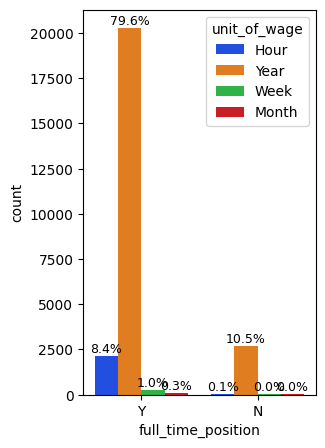

In [133]:
labeled_barplot2(vis,'full_time_position','unit_of_wage', order=["Y","N"], perc=True)
#user-defined labled_barplot function is taking x == 'full_time_position' and y as 'unit_of_wage' in the parameter order by "Y" and "N".


* Among full-time-positions 'yearly' is the most popular ~79.6%.

## Data Preprocessing

- Missing value treatment (if needed)
- Feature engineering 
- Outlier detection and treatment (if needed)
- Preparing data for modeling 
- Any other preprocessing steps (if needed)

### Feature Engineering

In [135]:
vis.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25480 entries, 0 to 25479
Data columns (total 12 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   case_id                25480 non-null  object 
 1   continent              25480 non-null  object 
 2   education_of_employee  25480 non-null  object 
 3   has_job_experience     25480 non-null  object 
 4   requires_job_training  25480 non-null  object 
 5   no_of_employees        25480 non-null  int64  
 6   yr_of_estab            25480 non-null  int64  
 7   region_of_employment   25480 non-null  object 
 8   prevailing_wage        25480 non-null  float64
 9   unit_of_wage           25480 non-null  object 
 10  full_time_position     25480 non-null  object 
 11  case_status            25480 non-null  object 
dtypes: float64(1), int64(2), object(9)
memory usage: 2.3+ MB


Turning the 'object' dtype variables into 'category'

In [136]:
vis.drop(labels='case_id', axis=1, inplace=True) #since id's are all unique values so, we will drop them

In [137]:
# convert all columns with dtype object into category
for i in vis.columns[vis.dtypes=='object']:
    vis[i] = vis[i].astype('category')

In [138]:
vis.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25480 entries, 0 to 25479
Data columns (total 11 columns):
 #   Column                 Non-Null Count  Dtype   
---  ------                 --------------  -----   
 0   continent              25480 non-null  category
 1   education_of_employee  25480 non-null  category
 2   has_job_experience     25480 non-null  category
 3   requires_job_training  25480 non-null  category
 4   no_of_employees        25480 non-null  int64   
 5   yr_of_estab            25480 non-null  int64   
 6   region_of_employment   25480 non-null  category
 7   prevailing_wage        25480 non-null  float64 
 8   unit_of_wage           25480 non-null  category
 9   full_time_position     25480 non-null  category
 10  case_status            25480 non-null  category
dtypes: category(8), float64(1), int64(2)
memory usage: 797.7 KB


* We have sucessfully converted the 'object' .dtype to 'category' .dtype for prediction purposes.

Lets cross-check the integer variables and categorise it within them

<Axes: xlabel='prevailing_wage'>

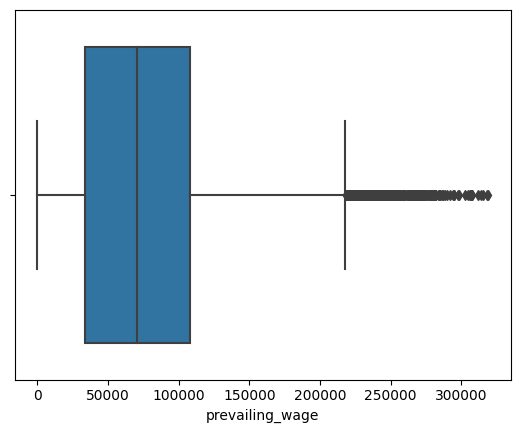

In [139]:
sns.boxplot(vis,x = 'prevailing_wage')

Lets precise the prevailing wage variable by classifying it into different intervals

In [140]:
bins = [0,25000,50000,75000,100000,125000,np.inf]              #using the pd.cut() to assign different intervals for our values
names = ['$ 0-25k','$ 25k-50k','$ 50k-75k','$ 75k-100k','$ 100k-125k','$ 125k+']
#assign an applicant to a category
vis['income_interval'] = pd.cut(vis['prevailing_wage'], bins, labels=names)

In [141]:
vis['income_interval'].value_counts()     #the new intervals with the prevailing wage values categorized

$ 0-25k        5008
$ 50k-75k      4505
$ 75k-100k     4332
$ 25k-50k      4076
$ 125k+        4011
$ 100k-125k    3548
Name: income_interval, dtype: int64

Now, lets do the number of employees too

<Axes: xlabel='no_of_employees'>

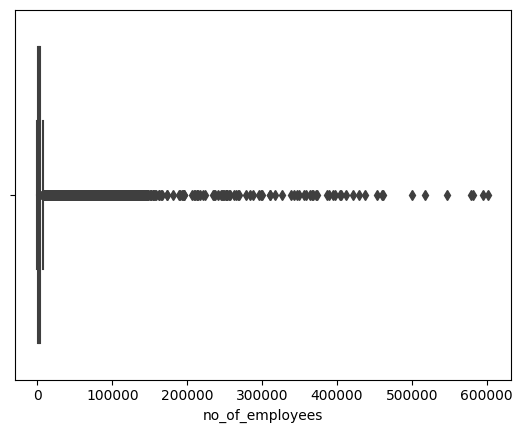

In [142]:
sns.boxplot(vis,x = 'no_of_employees')      #seaborn boxplot will generate a boxplot with x == 'no_of_employees'

In [143]:
bins = [0,1000,2000,3000,4000,np.Inf]
names = ['0-1000','1000-2000','2000-3000','3000-4000','4000+']
#assign each applicant to a category which indicates the size of the company he or she is applying to
vis['company_workforce'] = pd.cut(vis['no_of_employees'], bins, labels=names)
vis.company_workforce.value_counts()

0-1000       6208
1000-2000    5915
2000-3000    4978
4000+        4798
3000-4000    3548
Name: company_workforce, dtype: int64

<Axes: xlabel='yr_of_estab'>

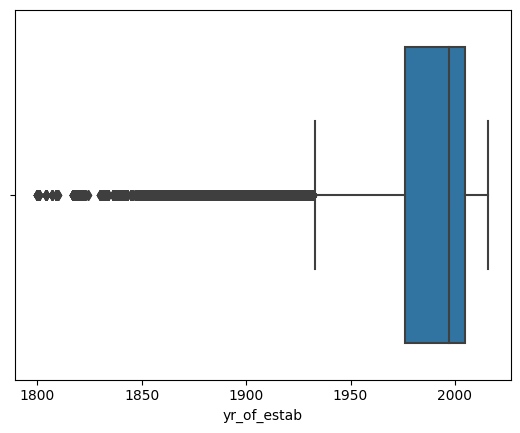

In [144]:
sns.boxplot(vis,x='yr_of_estab')        #seaborn boxplot will generate a boxplot with x == 'yr_of_estab'

In [145]:
bins = [0,1800,1850,1900,1950,2000,np.inf]
names = ['150+','50-100','40-50','20-40','10-20','0-10']        
vis['company_age'] = pd.cut(vis['yr_of_estab'],bins,labels = names)              #using the pd.cut() to assign different intervals for our values
vis['company_age'].value_counts()

10-20     11717
0-10       9663
20-40      1953
40-50      1495
50-100      636
150+         16
Name: company_age, dtype: int64

The values has been into different intervals for more precise predictions.

In [146]:
#dropping the integer variables 'number of employees','year of establishment' since we have already captured it
vis.drop(labels=['no_of_employees','yr_of_estab'], axis=1, inplace=True)

In [147]:
vis['case_status'].value_counts()    #the number of certified candidates are 17018

Certified    17018
Denied        8462
Name: case_status, dtype: int64

### Turning the "Y/yes" and "N/no" into 1's and 0's for the variables
* Case Status
* Has Job Experience
* Requires Job Training

In [148]:
# Using map function
vis['case_status'] = vis['case_status'].map({'Certified': 1, 'Denied': 0})     #converting the 'certified' and 'denied' as 1's and 0's for prediction purposes

In [149]:
vis['has_job_experience'] = vis['has_job_experience'].map({'Y': 1, 'N': 0})             #converting the 'Y' and 'N' as 1's and 0's for prectiction purposes
vis['requires_job_training'] = vis['requires_job_training'].map({'Y': 1, 'N': 0})        #converting the 'Y' and 'N' as 1's and 0's for prectiction purposes

### Splitting the data

In [151]:
#create a dataframe of the predictor feature columns
X = vis.drop('case_status', axis=1)
y = vis['case_status']                               

In [152]:
# Use pandas function get_dummies to create dummy variables and drop their first one
X = pd.get_dummies(X, drop_first=True)

# Check updated independent variables data frame
X.value_counts()

prevailing_wage  continent_Asia  continent_Europe  continent_North America  continent_Oceania  continent_South America  education_of_employee_Doctorate  education_of_employee_High School  education_of_employee_Master's  has_job_experience_1  requires_job_training_1  region_of_employment_Midwest  region_of_employment_Northeast  region_of_employment_South  region_of_employment_West  unit_of_wage_Month  unit_of_wage_Week  unit_of_wage_Year  full_time_position_Y  income_interval_$ 25k-50k  income_interval_$ 50k-75k  income_interval_$ 75k-100k  income_interval_$ 100k-125k  income_interval_$ 125k+  company_workforce_1000-2000  company_workforce_2000-3000  company_workforce_3000-4000  company_workforce_4000+  company_age_50-100  company_age_40-50  company_age_20-40  company_age_10-20  company_age_0-10
2.1367           0               0                 1                        0                  0                        0                                0                                  1     

In [153]:
# Splitting data into training and test set:
X_train, X_test, y_train, y_test =train_test_split(X, y, test_size=0.3, random_state=1,stratify=y)
print(X_train.shape, X_test.shape)

(17836, 33) (7644, 33)


**The Stratify arguments maintain the original distribution of classes in the target variable while splitting the data into train and test sets.**

In [154]:
y.value_counts(1)

1    0.667896
0    0.332104
Name: case_status, dtype: float64

In [155]:
y_test.value_counts(1)

1    0.667844
0    0.332156
Name: case_status, dtype: float64

### Continued EDA

In [206]:
# User-defined function to plot a stacked barplot
def stacked_barplot(data, predictor, target, xlabel, ylabel):
    """
    Print the category counts and plot a stacked bar chart

    data: dataframe
    predictor: independent variable
    target: target variable
    xlabel: label of x-axis
    ylabel: label of y-axis
    """

    count = data[predictor].nunique()
    sorter = data[target].value_counts().index[-1]
    tab1 = pd.crosstab(data[predictor], data[target], margins=True).sort_values(
        by=sorter, ascending=False
    )
    print(tab1)
    print("-" * 120)
    tab = pd.crosstab(data[predictor], data[target], normalize="index").sort_values(
        by=sorter, ascending=False
    )
    tab.plot(kind="bar", stacked=True, figsize=(count + 2, 4))

    plt.legend(loc="upper left", bbox_to_anchor=(1, 1), fontsize=16)
    plt.xlabel(xlabel, fontsize=16)
    plt.ylabel(ylabel, fontsize=16)

    plt.xticks(fontsize=14)
    plt.yticks(fontsize=14)

    plt.show()

Company Workforce Vs Income Interval

income_interval    $ 0-25k  $ 25k-50k  $ 50k-75k  $ 75k-100k  $ 100k-125k  \
company_workforce                                                           
All                   5001       4067       4503        4326         3543   
0-1000                1214        960       1081        1057          864   
1000-2000             1180        898       1047         995          863   
2000-3000              994        735        849         850          730   
4000+                  935        875        883         803          624   
3000-4000              678        599        643         621          462   

income_interval    $ 125k+    All  
company_workforce                  
All                   4007  25447  
0-1000                1032   6208  
1000-2000              932   5915  
2000-3000              820   4978  
4000+                  678   4798  
3000-4000              545   3548  
-----------------------------------------------------------------------------------------------

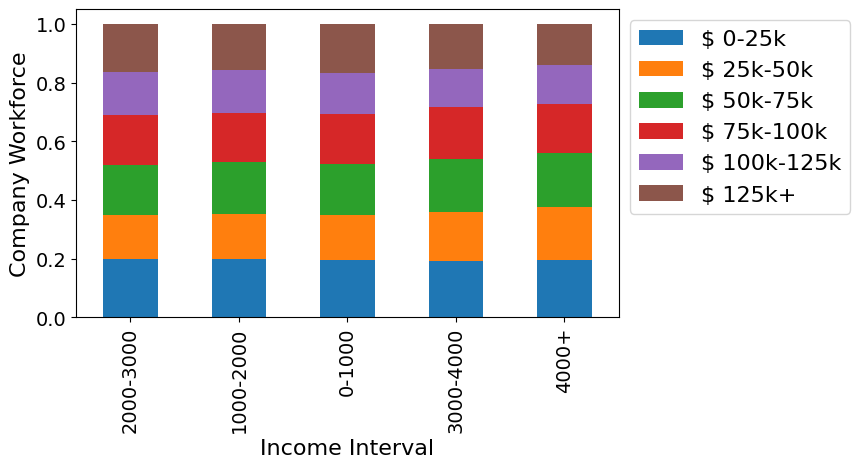

In [210]:
stacked_barplot(vis,'company_workforce','income_interval','Income Interval','Company Workforce' )

* We can see that almost despite of number of employees all the companies has all grades of payscale which was upto $125k +. 

Region of employment vs Income interval

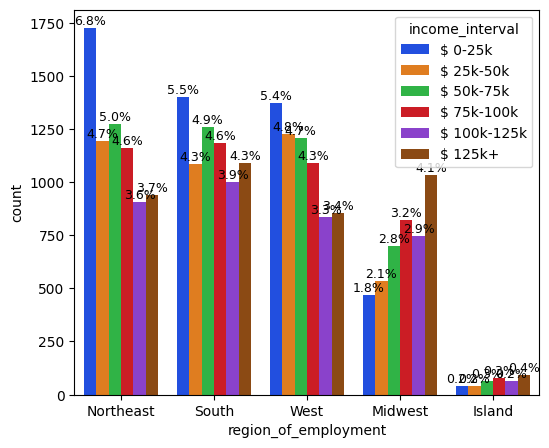

In [211]:
labeled_barplot2(vis,'region_of_employment','income_interval', order=["Northeast","South","West","Midwest","Island"], perc=True)

* We can see that most of the companies ranging salary mostly from $0-25k are at the North-Eastern side has the most companies with that income interval. Where, in the South the pay-scale is ~4.3% of the income interval $125k which is important for our prediction.

Education of employee Vs Income Interval

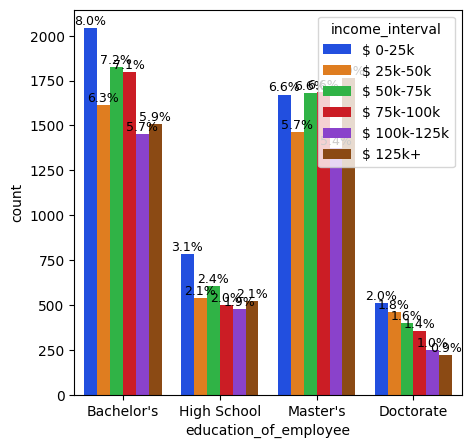

In [212]:
labeled_barplot2(vis,'education_of_employee','income_interval', order=["Bachelor's","High School","Master's","Doctorate"], perc=True)

This is a very useful bit of information as we can see that the low paying jobs are the most popular among the student from the 'Bachelor's' studies and the highest paying jobs are most popular among 'Master's' students.

## Model evaluation criterion


**The model can make wrong predictions as:**
1. If visa is predicted to be certified but, actually will be denied.
2. If visa is predicted to be denied but, actually will be certified.

Which case is more important?
1. The first case is more hostile since, if someone fails to clear the background check or any other reasons by the immigrations then, obviously he /she is not entering the United States. Also, it will minimize another candidate's chance to come and will obviously be a waste of staff's time and company's resourses.

**Which metric to optimize?**
 * We would want F1-Score to be maximized, the greater the F1-Score higher the chances of predicting both the classes correctly.

In [156]:
# defining a function to compute different metrics to check performance of a classification model built using sklearn
def model_performance_classification_sklearn(model, predictors, target):
    """
    Function to compute different metrics to check classification model performance

    model: classifier
    predictors: independent variables
    target: dependent variable
    """

    # predicting using the independent variables
    pred = model.predict(predictors)

    acc = accuracy_score(target, pred)  # to compute Accuracy
    recall = recall_score(target, pred)  # to compute Recall
    precision = precision_score(target, pred)  # to compute Precision
    f1 = f1_score(target, pred)  # to compute F1-score

    # creating a dataframe of metrics
    df_perf = pd.DataFrame(
        {
            "Accuracy": acc,
            "Recall": recall,
            "Precision": precision,
            "F1": f1,
        },
        index=[0],
    )

    return df_perf

In [157]:
def confusion_matrix_sklearn(model, predictors, target):
    """
    To plot the confusion_matrix with percentages

    model: classifier
    predictors: independent variables
    target: dependent variable
    """
    y_pred = model.predict(predictors)
    cm = confusion_matrix(target, y_pred)
    labels = np.asarray(
        [
            ["{0:0.0f}".format(item) + "\n{0:.2%}".format(item / cm.flatten().sum())]
            for item in cm.flatten()
        ]
    ).reshape(2, 2)

    plt.figure(figsize=(6, 4))
    sns.heatmap(cm, annot=labels, fmt="")
    plt.ylabel("True label")
    plt.xlabel("Predicted label")

Training performance:
    Accuracy  Recall  Precision   F1
0       1.0     1.0        1.0  1.0
Testing performance:
    Accuracy    Recall  Precision        F1
0  0.656986  0.737316   0.746085  0.741675


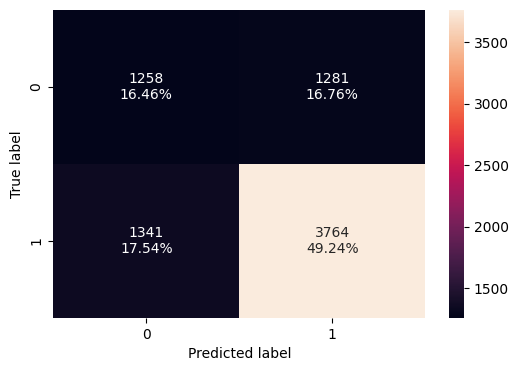

In [158]:
#Fitting the model
d_tree = DecisionTreeClassifier(random_state=1)
d_tree.fit(X_train,y_train)

#Calculating different metrics
d_tree_model_train_perf=model_performance_classification_sklearn(d_tree,X_train,y_train)
print("Training performance:\n",d_tree_model_train_perf)
d_tree_model_test_perf=model_performance_classification_sklearn(d_tree,X_test,y_test)
print("Testing performance:\n",d_tree_model_test_perf)

#Creating confusion matrix
confusion_matrix_sklearn(d_tree,X_test,y_test)

We can clearly see that the model is overfitting as its results on the testing data dosen't seem as good as the training.
But, lets try hyperparameter tuning to see if the model improves.

### Hyperparameter Tuning

In [159]:
#Choose the type of classifier. 
dtree_estimator = DecisionTreeClassifier(class_weight={0:0.18,1:0.72},random_state=1)

# Grid of parameters to choose from
parameters = {'max_depth': np.arange(2,30), 
              'min_samples_leaf': [1, 2, 5, 7, 10],
              'max_leaf_nodes' : [2, 3, 5, 10,15],
              'min_impurity_decrease': [0.0001,0.001,0.01,0.1]
             }

# Type of scoring used to compare parameter combinations
scorer = metrics.make_scorer(metrics.f1_score)

# Run the grid search
grid_obj = GridSearchCV(dtree_estimator, parameters, scoring=scorer,n_jobs=-1)
grid_obj = grid_obj.fit(X_train, y_train)

# Set the clf to the best combination of parameters
dtree_estimator = grid_obj.best_estimator_

# Fit the best algorithm to the data. 
dtree_estimator.fit(X_train, y_train)

DecisionTreeClassifier(class_weight={0: 0.18, 1: 0.72}, max_depth=5,
                       max_leaf_nodes=15, min_impurity_decrease=0.0001,
                       random_state=1)

Now, let's try predicting with the hypertuned model.

##  Will tuning the hyperparameters improve the model performance?

Training performance:
    Accuracy   Recall  Precision        F1
0  0.680982  0.99488   0.677993  0.806423
Testing performance:
    Accuracy    Recall  Precision        F1
0  0.676478  0.994319      0.675  0.804119


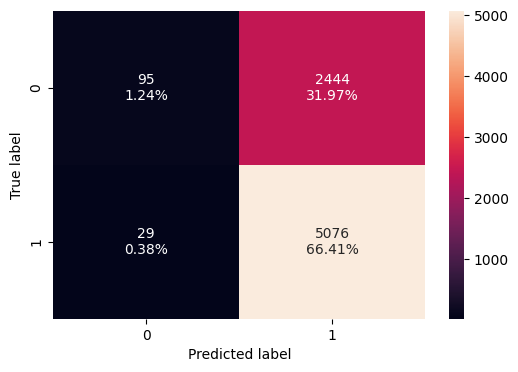

In [160]:
#Calculating different metrics
dtree_estimator_model_train_perf=model_performance_classification_sklearn(dtree_estimator,X_train,y_train)
print("Training performance:\n",dtree_estimator_model_train_perf)
dtree_estimator_model_test_perf=model_performance_classification_sklearn(dtree_estimator,X_test,y_test)
print("Testing performance:\n",dtree_estimator_model_test_perf)

#Creating confusion matrix
confusion_matrix_sklearn(dtree_estimator,X_test,y_test)

The performance for the hypertuned model is really impressive as, we can see that the testing set almost predicted the same F1 score as the training set.

One other thing we can also say is that the model is not overfitting anymore too and the F1 score also jumped from ~0.74 to ~0.80.

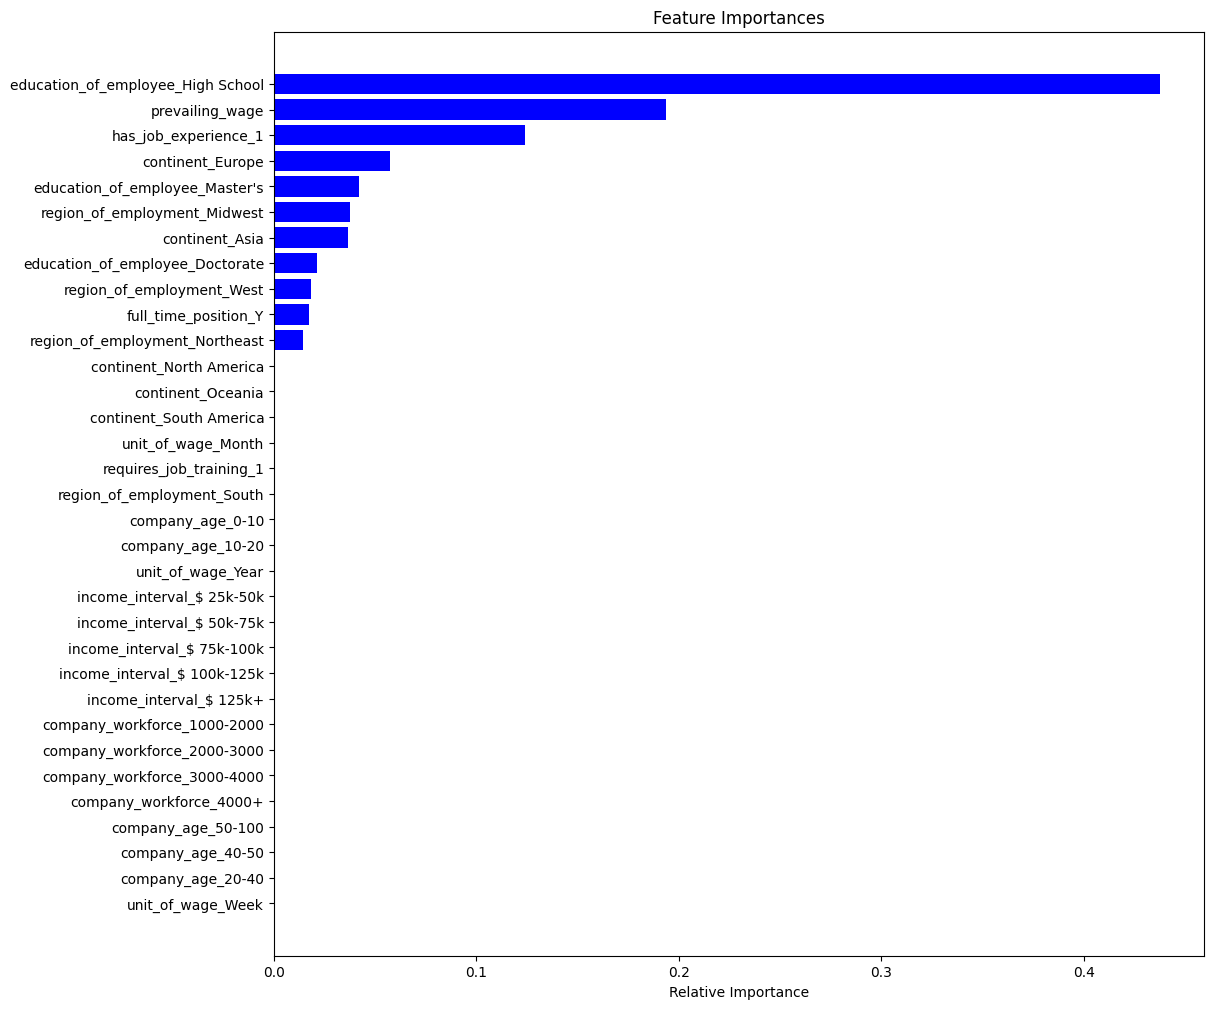

In [161]:
feature_names = list(X.columns)
importances = dtree_estimator.feature_importances_
indices = np.argsort(importances)

plt.figure(figsize=(12,12))
plt.title('Feature Importances')
plt.barh(range(len(indices)), importances[indices], color='blue', align='center')
plt.yticks(range(len(indices)), [feature_names[i] for i in indices])
plt.xlabel('Relative Importance')
plt.show()

We see that the high school education level has been the most important factor for the prediction.

In [162]:
# User-defined function to compute different performance metrics to evaluate a classification model built using sklearn
def get_metrics_score(model, flag=True):
    """
    model: classifier to predict values of Y
    """

    # Predict Y using independent variables
    pred_train = model.predict(X_train)
    pred_test = model.predict(X_test)

    # Compute performance metrics
    train_acc = accuracy_score(y_train, pred_train)  # accuracy
    test_acc = accuracy_score(y_test, pred_test)

    train_recall = recall_score(y_train, pred_train)  # recall
    test_recall = recall_score(y_test, pred_test)

    train_precision = precision_score(y_train, pred_train)  # precision
    test_precision = precision_score(y_test, pred_test)

    train_f1 = f1_score(y_train, pred_train)  # f1-score
    test_f1 = f1_score(y_test, pred_test)

    # Create a dataframe of metrics
    df_perf = pd.DataFrame(
        {
            "Accuracy": [train_acc, test_acc],
            "Recall": [train_recall, test_recall],
            "Precision": [train_precision, test_precision],
            "F1": [train_f1, test_f1],
        },
        index=["Training", "Test"],
    )

    return df_perf

In [163]:
# User-defined function to plot the confusion_matrix of a classification model built using sklearn based on test set
def make_confusion_matrix(model):
    """
    model: classifier to predict values of Y
    """
    Y_pred = model.predict(X_test)
    cm = confusion_matrix(y_test, Y_pred)
    labels = np.asarray(
        [
            ["{0:0.0f}".format(item) + "\n{0:.2%}".format(item / cm.flatten().sum())]
            for item in cm.flatten()
        ]
    ).reshape(2, 2)

    plt.figure(figsize=(6, 4))
    sns.heatmap(cm, annot=labels, fmt="")
    plt.title("Test Set's Confusion Matrix", fontsize=16)
    plt.ylabel("Actual Label", fontsize=15)

$Bagging$ - $Model$ $Building$ and $Hyperparameter$ $Tuning$

   Accuracy   Recall  Precision        F1
0  0.982059  0.98212   0.990938  0.986509
   Accuracy    Recall  Precision        F1
0  0.676347  0.755338   0.758906  0.757118


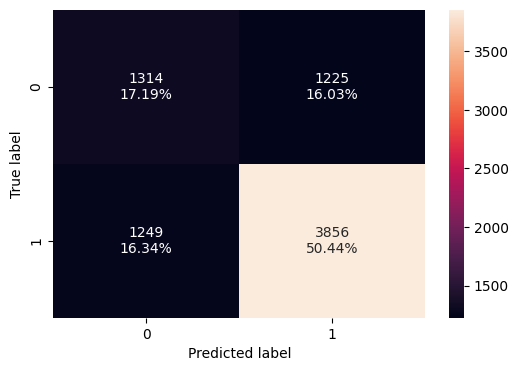

In [164]:
#Fitting the model
bagging_classifier = BaggingClassifier(random_state=1)
bagging_classifier.fit(X_train,y_train)

#Calculating different metrics
bagging_classifier_model_train_perf=model_performance_classification_sklearn(bagging_classifier,X_train,y_train)
print(bagging_classifier_model_train_perf)
bagging_classifier_model_test_perf=model_performance_classification_sklearn(bagging_classifier,X_test,y_test)
print(bagging_classifier_model_test_perf)

#Creating confusion matrix
confusion_matrix_sklearn(bagging_classifier,X_test,y_test)

##  Will tuning the hyperparameters improve the model performance?

In [165]:
# Choose the type of classifier. 
bagging_estimator_tuned = BaggingClassifier(random_state=1)

# Grid of parameters to choose from
parameters = {'max_samples': [0.7,0.8,0.9,1], 
              'max_features': [0.7,0.8,0.9,1],
              'n_estimators' : [10,20,30,40,50],
             }

# Type of scoring used to compare parameter combinations
scorer = metrics.make_scorer(metrics.f1_score)

# Run the grid search
grid_obj = GridSearchCV(bagging_estimator_tuned, parameters, scoring=scorer,cv=5)
grid_obj = grid_obj.fit(X_train, y_train)

# Set the clf to the best combination of parameters
bagging_estimator_tuned = grid_obj.best_estimator_

# Fit the best algorithm to the data.
bagging_estimator_tuned.fit(X_train, y_train)

BaggingClassifier(max_features=0.7, max_samples=0.7, n_estimators=50,
                  random_state=1)

   Accuracy    Recall  Precision        F1
0  0.973368  0.996642   0.964657  0.980389
   Accuracy    Recall  Precision        F1
0  0.717425  0.871694   0.747271  0.804702


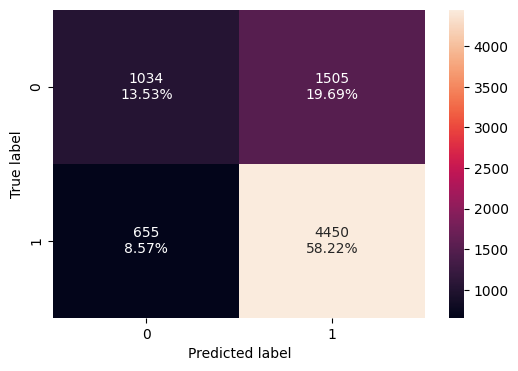

In [166]:
#Calculating different metrics
bagging_estimator_tuned_model_train_perf=model_performance_classification_sklearn(bagging_estimator_tuned,X_train,y_train)
print(bagging_estimator_tuned_model_train_perf)
bagging_estimator_tuned_model_test_perf=model_performance_classification_sklearn(bagging_estimator_tuned,X_test,y_test)
print(bagging_estimator_tuned_model_test_perf)

#Creating confusion matrix
confusion_matrix_sklearn(bagging_estimator_tuned,X_test,y_test)

It seems that hypertune has worked but still there is overfitting as the testing data didn't perform as well as the training data.

Random Forest Classifier

Training performance:
    Accuracy  Recall  Precision        F1
0  0.999944     1.0   0.999916  0.999958
Testing performance:
    Accuracy    Recall  Precision        F1
0  0.693485  0.800392   0.755268  0.777175


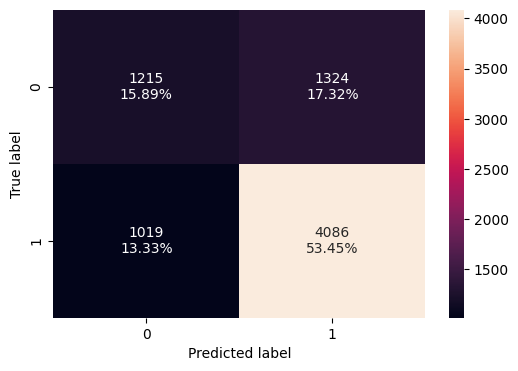

In [167]:
#Fitting the model
rf_estimator = RandomForestClassifier(random_state=1)
rf_estimator.fit(X_train,y_train)

#Calculating different metrics
rf_estimator_model_train_perf=model_performance_classification_sklearn(rf_estimator,X_train,y_train)
print("Training performance:\n",rf_estimator_model_train_perf)
rf_estimator_model_test_perf=model_performance_classification_sklearn(rf_estimator,X_test,y_test)
print("Testing performance:\n",rf_estimator_model_test_perf)

#Creating confusion matrix
confusion_matrix_sklearn(rf_estimator,X_test,y_test)

Now, hyperparameter tuning on random forest classifier

In [168]:
rf_tuned = RandomForestClassifier(oob_score=True, random_state=1)

# Form grid of parameters to search in
grid_para = {
    "class_weight": ["balanced", None],
    "max_samples": [0.7, 0.8, 0.9, 1.0],
    "max_depth": np.arange(1, 5, 1),
    "max_features": ["sqrt", "log2"],
    "min_samples_split": [100, 200, 400, 800],
    "n_estimators": np.arange(20, 110, 20),
}

# Set type of score used to evaluate performance throughout search
scorer = make_scorer(f1_score)

# Run GridSearch
grid_obj = GridSearchCV(rf_tuned, grid_para, scoring=scorer, cv=5)
grid_obj = grid_obj.fit(X_train, y_train)

# Set classifer to best combination of parameters
rf_tuned = grid_obj.best_estimator_

# Fit best decision tree to training data
rf_tuned.fit(X_train, y_train)

RandomForestClassifier(max_depth=4, max_samples=0.9, min_samples_split=100,
                       n_estimators=40, oob_score=True, random_state=1)

Training performance:
    Accuracy    Recall  Precision        F1
0  0.715968  0.958365   0.714143  0.818423
Testing performance:
    Accuracy    Recall  Precision        F1
0  0.708137  0.956905   0.708382  0.814099


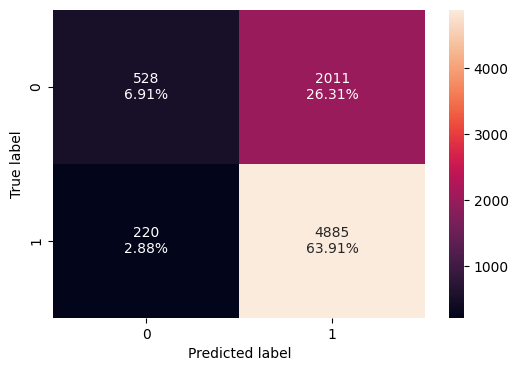

In [169]:
#Calculating different metrics
rf_tuned_model_train_perf=model_performance_classification_sklearn(rf_tuned,X_train,y_train)
print("Training performance:\n",rf_tuned_model_train_perf)
rf_tuned_model_test_perf=model_performance_classification_sklearn(rf_tuned,X_test,y_test)
print("Testing performance:\n",rf_tuned_model_test_perf)

#Creating confusion matrix
confusion_matrix_sklearn(rf_tuned,X_test,y_test)

This hypertuned model looks great actually ! We can see that maybe 81% may not seem a lot based on the previous outputs ~1.00 from the training data. But, if we see the F1 results from the testing set and the training set it seems that both has a bare minimum difference which actually shows how well this model was predicting our target.

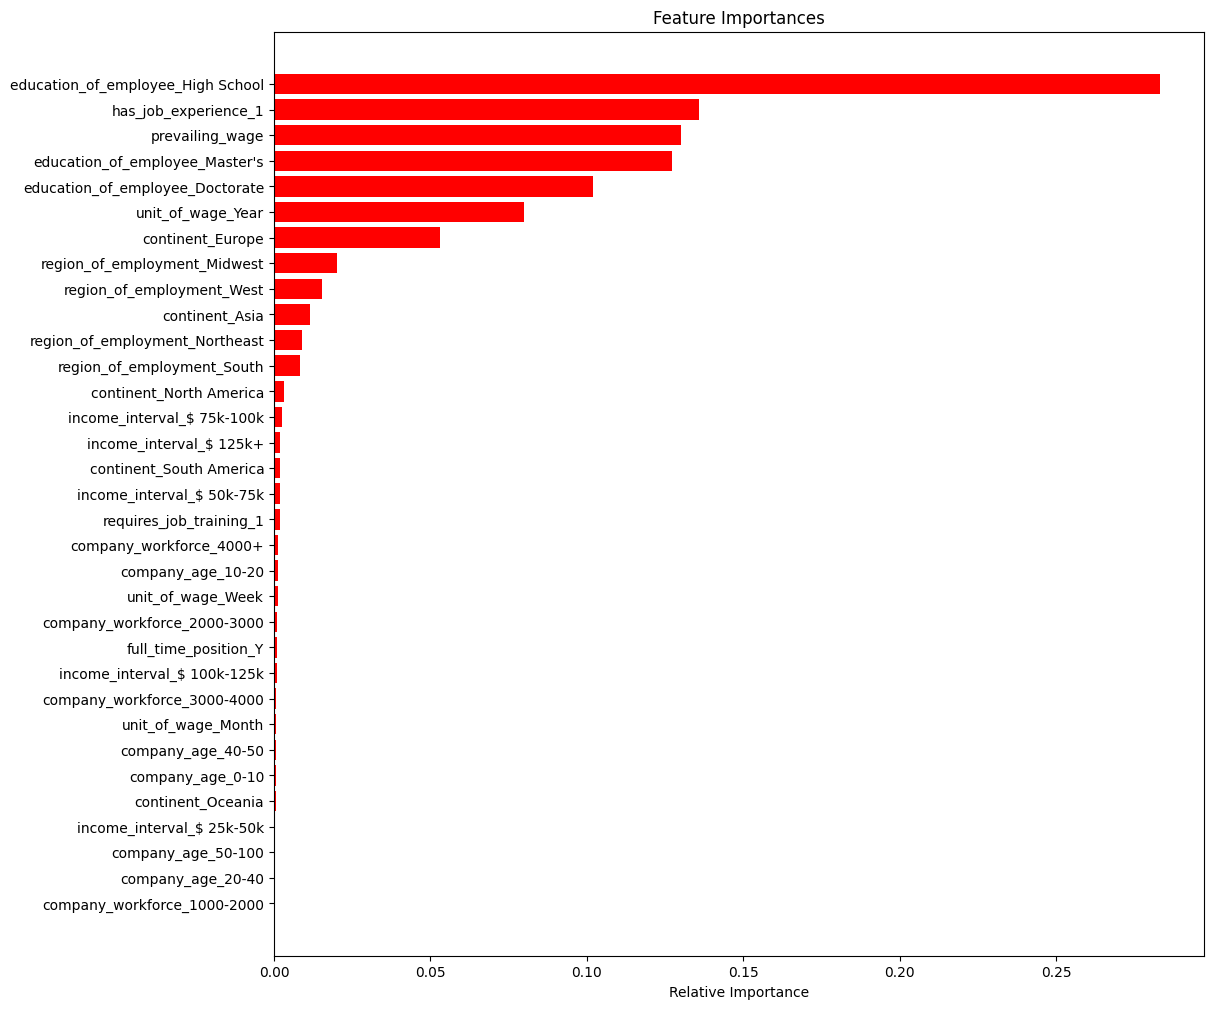

In [170]:
importances = rf_tuned.feature_importances_
indices = np.argsort(importances)

plt.figure(figsize=(12,12))
plt.title('Feature Importances')
plt.barh(range(len(indices)), importances[indices], color='red', align='center')
plt.yticks(range(len(indices)), [feature_names[i] for i in indices])
plt.xlabel('Relative Importance')
plt.show()

Still, we can see that our model keeping education of the employees in their high school as the most influential factor.

$Boosting$

### AdaBoost Classifier ###

   Accuracy    Recall  Precision        F1
0  0.736993  0.885419   0.760271  0.818087
   Accuracy    Recall  Precision        F1
0  0.734563  0.885015   0.758054  0.816629


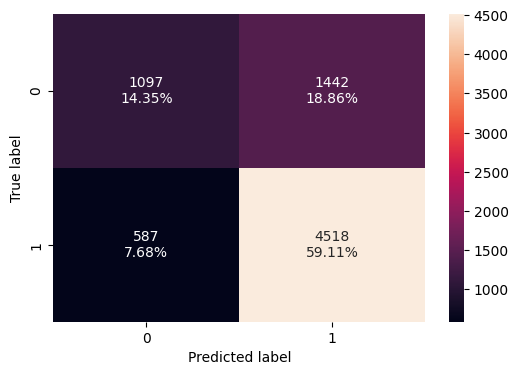

In [171]:
#Fitting the model
ab_classifier = AdaBoostClassifier(random_state=1)
ab_classifier.fit(X_train,y_train)

#Calculating different metrics
ab_classifier_model_train_perf=model_performance_classification_sklearn(ab_classifier,X_train,y_train)
print(ab_classifier_model_train_perf)
ab_classifier_model_test_perf=model_performance_classification_sklearn(ab_classifier,X_test,y_test)
print(ab_classifier_model_test_perf)

#Creating confusion matrix
confusion_matrix_sklearn(ab_classifier,X_test,y_test)

The F1 score already looks good on both sets. But, lets see if we can improve it through hyperparameter technique.

In [172]:
# Choose the type of classifier. 
abc_tuned = AdaBoostClassifier(random_state=1)

# Grid of parameters to choose from
parameters = {
    #Let's try different max_depth for base_estimator
    "base_estimator":[DecisionTreeClassifier(max_depth=1),DecisionTreeClassifier(max_depth=2),
                      DecisionTreeClassifier(max_depth=3)],
    "n_estimators": np.arange(10,110,10),
    "learning_rate":np.arange(0.1,2,0.1)
}

# Type of scoring used to compare parameter  combinations
scorer = metrics.make_scorer(metrics.f1_score)

# Run the grid search
grid_obj = GridSearchCV(abc_tuned, parameters, scoring=scorer,cv=5)
grid_obj = grid_obj.fit(X_train, y_train)

# Set the clf to the best combination of parameters
abc_tuned = grid_obj.best_estimator_

# Fit the best algorithm to the data.
abc_tuned.fit(X_train, y_train)

AdaBoostClassifier(base_estimator=DecisionTreeClassifier(max_depth=3),
                   learning_rate=0.1, n_estimators=60, random_state=1)

   Accuracy    Recall  Precision        F1
0  0.754093  0.888441   0.775896  0.828363
   Accuracy    Recall  Precision        F1
0  0.742282  0.883643   0.766265  0.820779


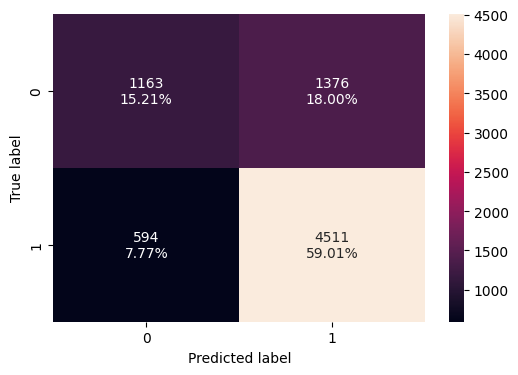

In [173]:
#Calculating different metrics
abc_tuned_model_train_perf=model_performance_classification_sklearn(abc_tuned,X_train,y_train)
print(abc_tuned_model_train_perf)
abc_tuned_model_test_perf=model_performance_classification_sklearn(abc_tuned,X_test,y_test)
print(abc_tuned_model_test_perf)

#Creating confusion matrix
confusion_matrix_sklearn(abc_tuned,X_test,y_test)

The data didn't improve that much from the previous model. But, no overfitting.

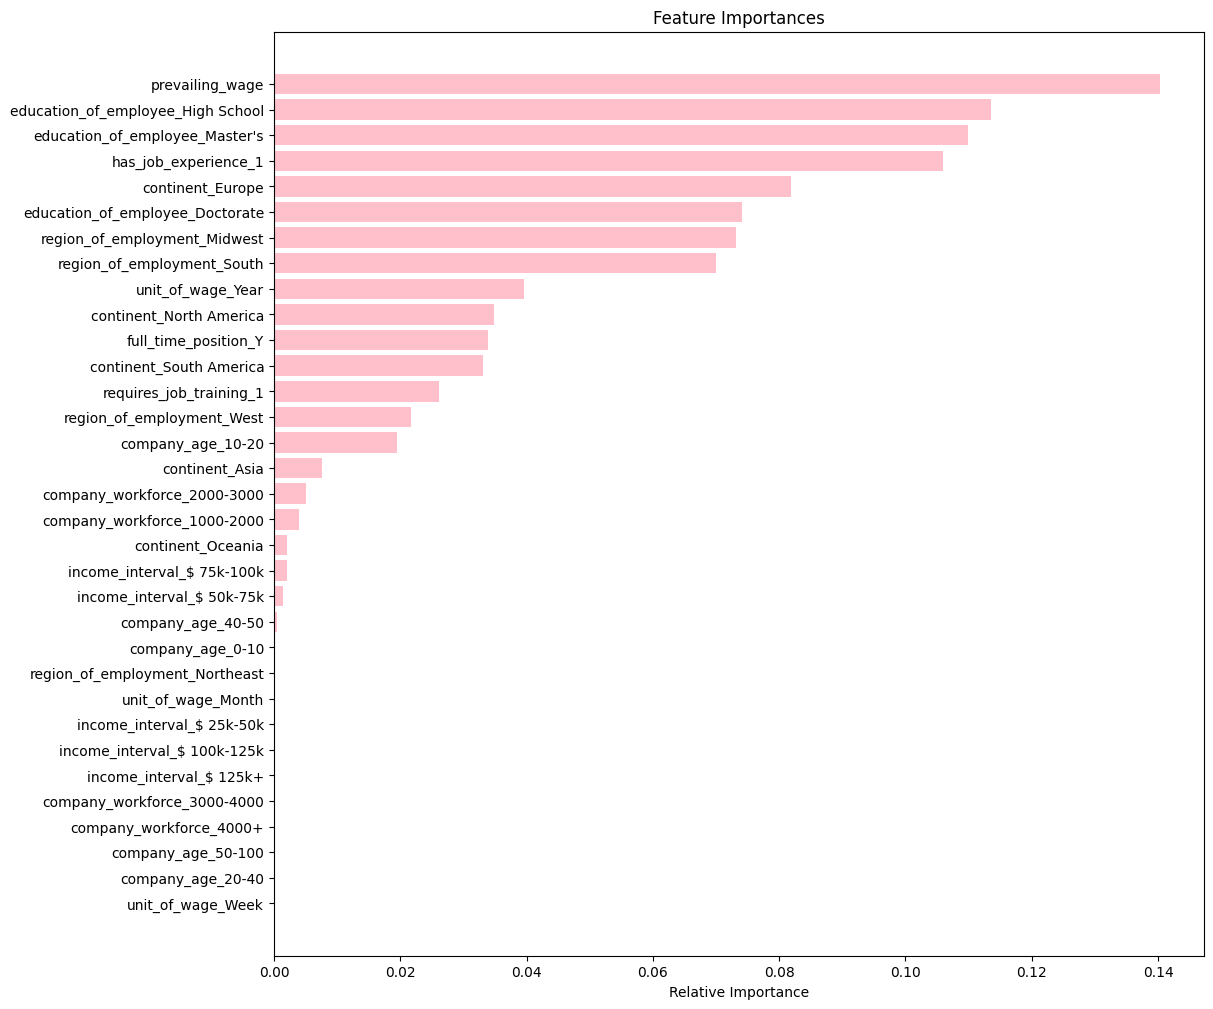

In [174]:
importances = abc_tuned.feature_importances_
indices = np.argsort(importances)

plt.figure(figsize=(12,12))
plt.title('Feature Importances')
plt.barh(range(len(indices)), importances[indices], color='pink', align='center')
plt.yticks(range(len(indices)), [feature_names[i] for i in indices])
plt.xlabel('Relative Importance')
plt.show()

Now, prevailing wage seems to be the most influential factor, then education of the employee_high_school, education_of_the_employee masters are the next most important factors after hypertuned adaptive boosting.

### Gradient Boosting Classifier

Training performance:
    Accuracy    Recall  Precision        F1
0  0.756896  0.877781   0.784059  0.828277
Testing performance:
    Accuracy    Recall  Precision        F1
0  0.746337  0.874241   0.774826  0.821537


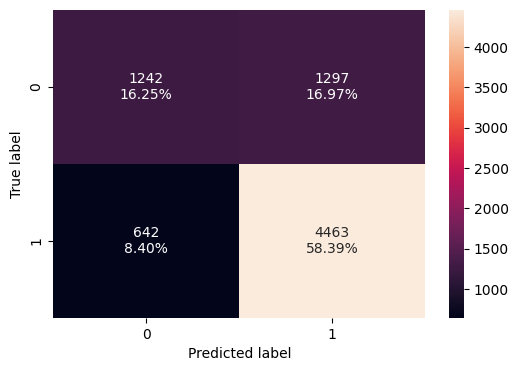

In [175]:
#Fitting the model
gb_classifier = GradientBoostingClassifier(random_state=1)
gb_classifier.fit(X_train,y_train)

#Calculating different metrics
gb_classifier_model_train_perf=model_performance_classification_sklearn(gb_classifier,X_train,y_train)
print("Training performance:\n",gb_classifier_model_train_perf)
gb_classifier_model_test_perf=model_performance_classification_sklearn(gb_classifier,X_test,y_test)
print("Testing performance:\n",gb_classifier_model_test_perf)

#Creating confusion matrix
confusion_matrix_sklearn(gb_classifier,X_test,y_test)

Ok the results seems to not overfit. Great signs but, lets hypertune it to see if we get a more better result.

### Hyperparameter tuning gradient classifier ###

In [176]:
# Choose the type of classifier. 
gbc_tuned = GradientBoostingClassifier(init=AdaBoostClassifier(random_state=1),random_state=1)

# Grid of parameters to choose from
parameters = {
    "n_estimators": [100,150,200,250],
    "subsample":[0.8,0.9,1],
    "max_features":[0.7,0.8,0.9,1]
}

# Type of scoring used to compare parameter combinations
scorer = metrics.make_scorer(metrics.f1_score)

# Run the grid search
grid_obj = GridSearchCV(gbc_tuned, parameters, scoring=scorer,cv=5)
grid_obj = grid_obj.fit(X_train, y_train)

# Set the clf to the best combination of parameters
gbc_tuned = grid_obj.best_estimator_

# Fit the best algorithm to the data.
gbc_tuned.fit(X_train, y_train)

GradientBoostingClassifier(init=AdaBoostClassifier(random_state=1),
                           max_features=0.7, random_state=1, subsample=1)

Training performance:
    Accuracy    Recall  Precision       F1
0  0.754317  0.874171   0.783184  0.82618
Testing performance:
    Accuracy   Recall  Precision       F1
0   0.74686  0.87287   0.776036  0.82161


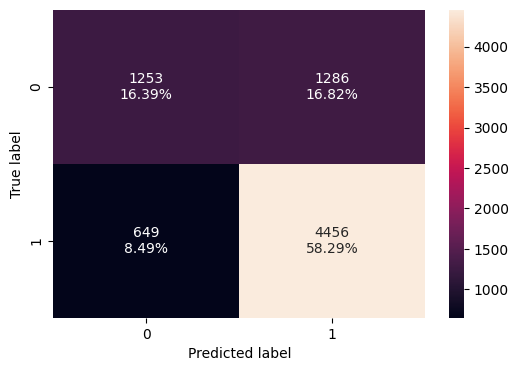

In [177]:
#Calculating different metrics
gbc_tuned_model_train_perf=model_performance_classification_sklearn(gbc_tuned,X_train,y_train)
print("Training performance:\n",gbc_tuned_model_train_perf)
gbc_tuned_model_test_perf=model_performance_classification_sklearn(gbc_tuned,X_test,y_test)
print("Testing performance:\n",gbc_tuned_model_test_perf)

#Creating confusion matrix
confusion_matrix_sklearn(gbc_tuned,X_test,y_test)

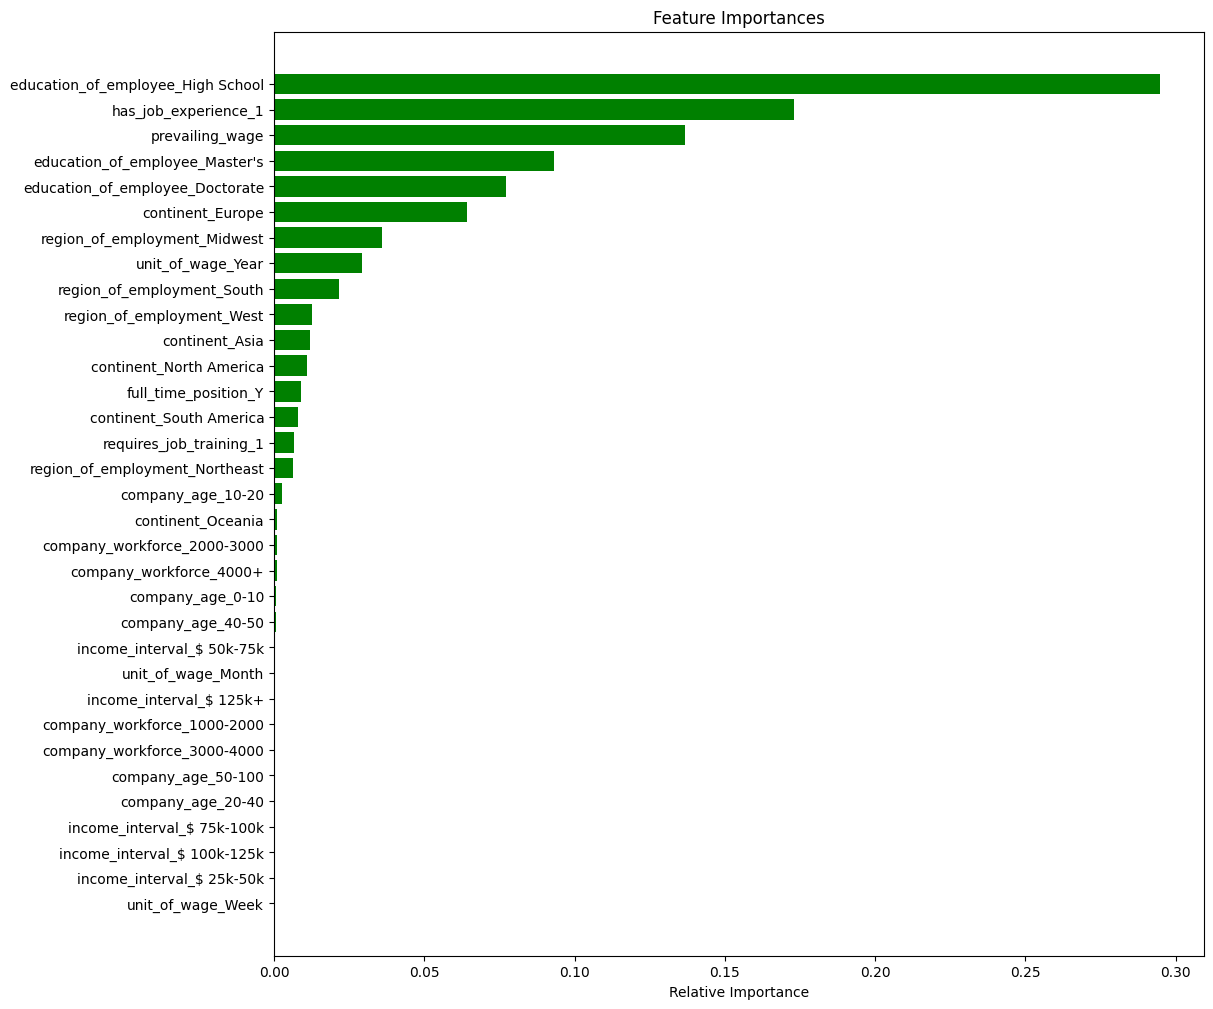

In [178]:
importances = gbc_tuned.feature_importances_
indices = np.argsort(importances)

plt.figure(figsize=(12,12))
plt.title('Feature Importances')
plt.barh(range(len(indices)), importances[indices], color='green', align='center')
plt.yticks(range(len(indices)), [feature_names[i] for i in indices])
plt.xlabel('Relative Importance')
plt.show()

The results dosen't seem to be too much different from the non-hypertuned model but, expected a bit more rise from the non-tuned model. But, lets run another classifier and see what the model has to say.

### XGBoost Classifier

Training performance:
    Accuracy    Recall  Precision        F1
0  0.812514  0.915638   0.823432  0.867091
Testing performance:
    Accuracy    Recall  Precision        F1
0  0.733386  0.863075   0.766928  0.812166


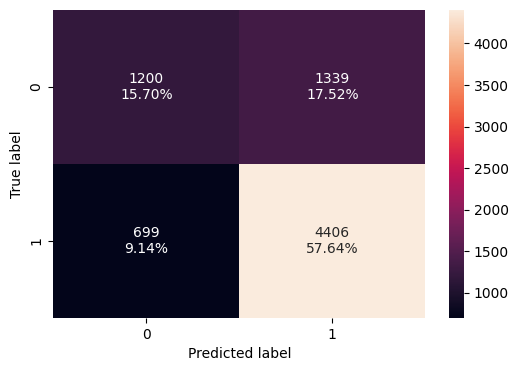

In [179]:
#Fitting the model
xgb_classifier = XGBClassifier(random_state=1, eval_metric='logloss')
xgb_classifier.fit(X_train,y_train)

#Calculating different metrics
xgb_classifier_model_train_perf=model_performance_classification_sklearn(xgb_classifier,X_train,y_train)
print("Training performance:\n",xgb_classifier_model_train_perf)
xgb_classifier_model_test_perf=model_performance_classification_sklearn(xgb_classifier,X_test,y_test)
print("Testing performance:\n",xgb_classifier_model_test_perf)

#Creating confusion matrix
confusion_matrix_sklearn(xgb_classifier,X_test,y_test)

Here, we can see that the training set result is bit more different from the testing set results of our other classifiers. But, the model might overfit a little bit. Lets hyperparameter tune it.

### Hyperparameter XGBoost classifier ###

In [180]:
# Choose the type of classifier. 
xgb_tuned = XGBClassifier(random_state=1, eval_metric='logloss')

# Grid of parameters to choose from
parameters = {
    "n_estimators": [10,30,50],
    "scale_pos_weight":[1,2,5],
    "subsample":[0.7,0.9,1],
    "learning_rate":[0.05, 0.1,0.2],
    "colsample_bytree":[0.7,0.9,1],
    "colsample_bylevel":[0.5,0.7,1]
}

# Type of scoring used to compare parameter combinations
scorer = metrics.make_scorer(metrics.f1_score)

# Run the grid search
grid_obj = GridSearchCV(xgb_tuned, parameters,scoring=scorer,cv=5)
grid_obj = grid_obj.fit(X_train, y_train)

# Set the clf to the best combination of parameters
xgb_tuned = grid_obj.best_estimator_

# Fit the best algorithm to the data.
xgb_tuned.fit(X_train, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=0.5, colsample_bynode=None,
              colsample_bytree=0.7, early_stopping_rounds=None,
              enable_categorical=False, eval_metric='logloss',
              feature_types=None, gamma=None, gpu_id=None, grow_policy=None,
              importance_type=None, interaction_constraints=None,
              learning_rate=0.2, max_bin=None, max_cat_threshold=None,
              max_cat_to_onehot=None, max_delta_step=None, max_depth=None,
              max_leaves=None, min_child_weight=None, missing=nan,
              monotone_constraints=None, n_estimators=10, n_jobs=None,
              num_parallel_tree=None, predictor=None, random_state=1, ...)

Training performance:
    Accuracy    Recall  Precision        F1
0  0.757849  0.888021   0.779932  0.830475
Testing performance:
    Accuracy    Recall  Precision        F1
0  0.744244  0.882664    0.76868  0.821738


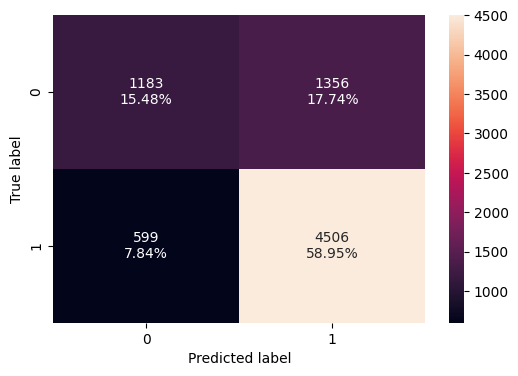

In [181]:
#Calculating different metrics
xgb_tuned_model_train_perf=model_performance_classification_sklearn(xgb_tuned,X_train,y_train)
print("Training performance:\n",xgb_tuned_model_train_perf)
xgb_tuned_model_test_perf=model_performance_classification_sklearn(xgb_tuned,X_test,y_test)
print("Testing performance:\n",xgb_tuned_model_test_perf)

#Creating confusion matrix
confusion_matrix_sklearn(xgb_tuned,X_test,y_test)

Ok the overfitting has reduced for the training data, the difference between the training and testing predictions has been minimized. Overall, even if the testing result didn't show enough improvements but, this model after hypertuning has been more/less satisfactory.

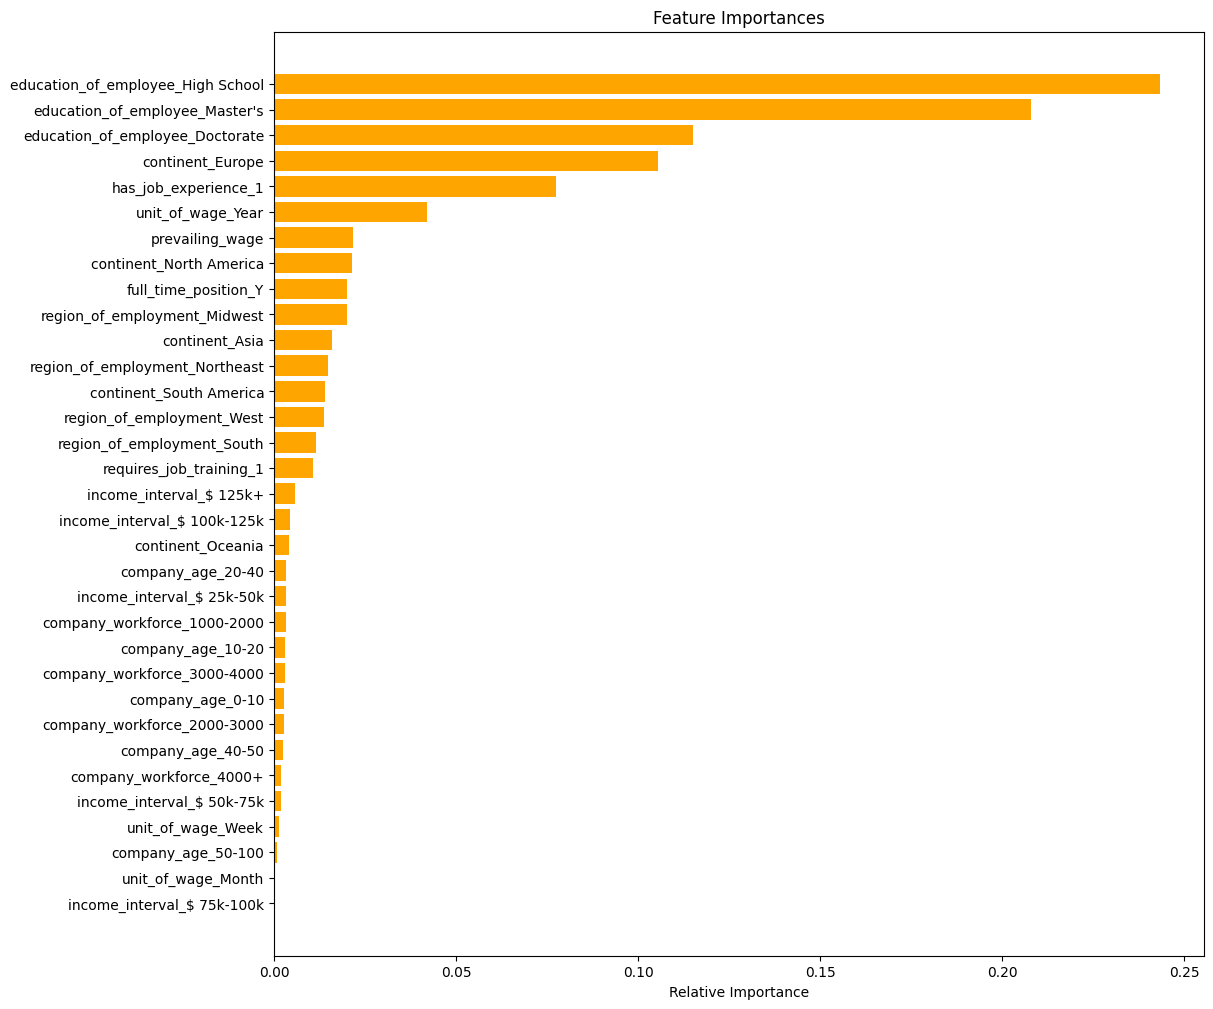

In [182]:
importances = xgb_tuned.feature_importances_
indices = np.argsort(importances)

plt.figure(figsize=(12,12))
plt.title('Feature Importances')
plt.barh(range(len(indices)), importances[indices], color='orange', align='center')
plt.yticks(range(len(indices)), [feature_names[i] for i in indices])
plt.xlabel('Relative Importance')
plt.show()

### Stacking classifier

In [183]:
estimators = [('Random Forest',rf_tuned), ('Gradient Boosting',gbc_tuned), ('Decision Tree',dtree_estimator)]

final_estimator = xgb_tuned

stacking_classifier= StackingClassifier(estimators=estimators,final_estimator=final_estimator)

stacking_classifier.fit(X_train,y_train)

StackingClassifier(estimators=[('Random Forest',
                                RandomForestClassifier(max_depth=4,
                                                       max_samples=0.9,
                                                       min_samples_split=100,
                                                       n_estimators=40,
                                                       oob_score=True,
                                                       random_state=1)),
                               ('Gradient Boosting',
                                GradientBoostingClassifier(init=AdaBoostClassifier(random_state=1),
                                                           max_features=0.7,
                                                           random_state=1,
                                                           subsample=1)),
                               ('Decision Tree',
                                DecisionTreeClassifier(class_weig...
                                                 gpu_id=None, grow_policy=None,
                                                 importance_type=None,
                                                 interaction_constraints=None,
                                                 learning_rate=0.2,
                                                 max_bin=None,
                                                 max_cat_threshold=None,
                                                 max_cat_to_onehot=None,
                                                 max_delta_step=None,
                                                 max_depth=None,
                                                 max_leaves=None,
                                                 min_child_weight=None,
                                                 missing=nan,
                                                 monotone_constraints=None,
                                                 n_estimators=10, n_jobs=None,
                                                 num_parallel_tree=None,
                                                 predictor=None, random_state=1, ...))

Training performance:
    Accuracy    Recall  Precision        F1
0  0.754373  0.882229   0.779211  0.827526
Testing performance:
    Accuracy    Recall  Precision        F1
0  0.746599  0.878355   0.773103  0.822375


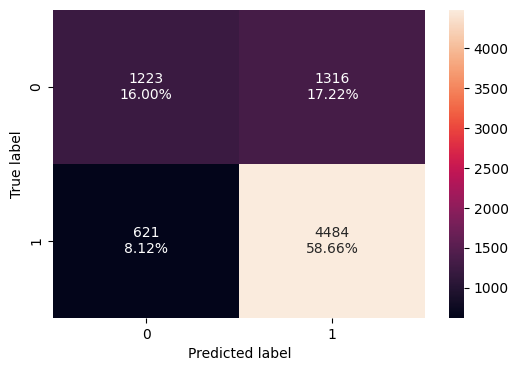

In [184]:
#Calculating different metrics
stacking_classifier_model_train_perf=model_performance_classification_sklearn(stacking_classifier,X_train,y_train)
print("Training performance:\n",stacking_classifier_model_train_perf)
stacking_classifier_model_test_perf=model_performance_classification_sklearn(stacking_classifier,X_test,y_test)
print("Testing performance:\n",stacking_classifier_model_test_perf)

#Creating confusion matrix
confusion_matrix_sklearn(stacking_classifier,X_test,y_test)

## Model Performance Comparison and Conclusions

In [194]:
# testing performance comparison

models_test_comp_df = pd.concat(
    [d_tree_model_test_perf.T,dtree_estimator_model_test_perf.T,rf_estimator_model_test_perf.T,rf_tuned_model_test_perf.T,
     bagging_classifier_model_test_perf.T,bagging_estimator_tuned_model_test_perf.T,ab_classifier_model_test_perf.T,
     abc_tuned_model_test_perf.T,gb_classifier_model_test_perf.T,gbc_tuned_model_test_perf.T,xgb_classifier_model_test_perf.T,
    xgb_tuned_model_test_perf.T,stacking_classifier_model_test_perf.T],
    axis=1,
)
models_test_comp_df.columns = [
    "Decision Tree",
    "Decision Tree Estimator",
    "Random Forest Estimator",
    "Random Forest Tuned",
    "Bagging Classifier",
    "Bagging Estimator Tuned",
    "Adaboost Classifier",
    "Adabosst Classifier Tuned",
    "Gradient Boost Classifier",
    "Gradient Boost Classifier Tuned",
    "XGBoost Classifier",
    "XGBoost Classifier Tuned",
    "Stacking Classifier"]
print("Testing performance comparison:")
models_test_comp_df.T

Testing performance comparison:


,Accuracy,Recall,Precision,F1
Decision Tree,0.656986,0.737316,0.746085,0.741675
Decision Tree Estimator,0.676478,0.994319,0.675000,0.804119
Random Forest Estimator,0.693485,0.800392,0.755268,0.777175
Random Forest Tuned,0.708137,0.956905,0.708382,0.814099
Bagging Classifier,0.676347,0.755338,0.758906,0.757118
Bagging Estimator Tuned,0.717425,0.871694,0.747271,0.804702
Adaboost Classifier,0.734563,0.885015,0.758054,0.816629
Adabosst Classifier Tuned,0.742282,0.883643,0.766265,0.820779
Gradient Boost Classifier,0.746337,0.874241,0.774826,0.821537
Gradient Boost Classifier Tuned,0.746860,0.872870,0.776036,0.821610


* We can see that based on the F1 scores 'Stacking Classifier' had ~82.2 % consecutively, 'XGBoost Classifier tuned' ~82.1 % and 'Gradient boost classifier' ~82.15%.

* Overall the data wasn't overfitting in most cases except 'XGBoost Classifier' and the F1 scores were satisfactory too.

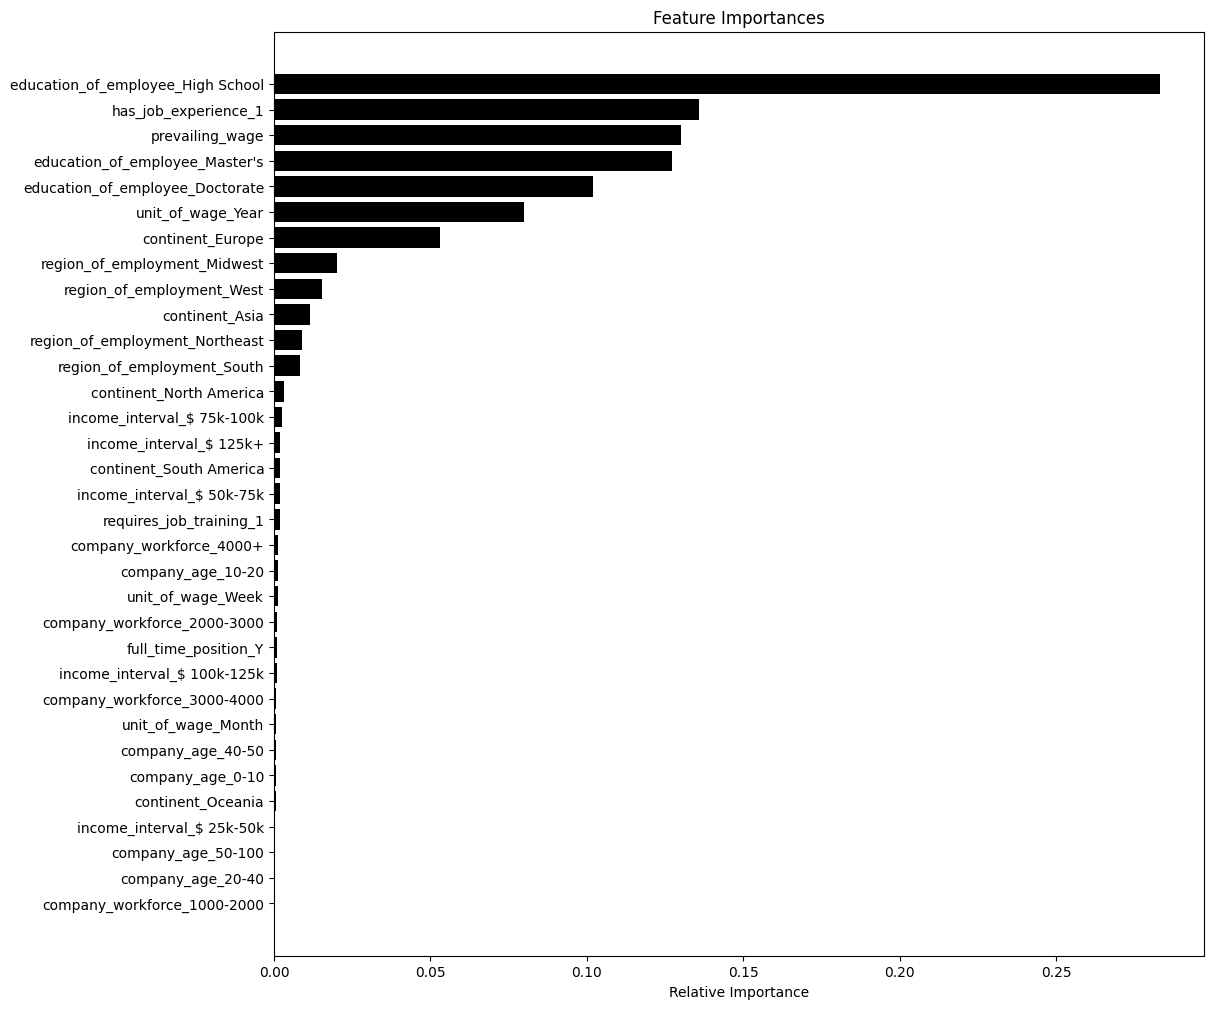

In [198]:
feature_names = X_train.columns
importances = rf_tuned.feature_importances_
indices = np.argsort(importances)

plt.figure(figsize=(12,12))
plt.title('Feature Importances')
plt.barh(range(len(indices)), importances[indices], color='black', align='center')
plt.yticks(range(len(indices)), [feature_names[i] for i in indices])
plt.xlabel('Relative Importance')
plt.show()

## Actionable Insights and Recommendations

### Insights
* Most companies were established around the year 2000.
* ~40.2% did their Bachelor's or are in their Bachelor's where ~37.8% doing/already did their Masters among the candidates who applies.
* ~88.4% dosen't require job training and only ~11.6% people does.
* Asia has the highest amount of visa candidates ~66.2 % and Europe has the second-highest ~14.6%.
* Most popular regions to work was 'Northeastern'(~28.2%) and 'Southern'(~27.5%) side.
* Almost all the candidates applied as a 'full-time'employee.
* ~35.2% of the Bachelor's students or completed does not need job training.
* But, only 11.7% high-school graduates need job training which is really surprising as high schooler are less likely to be experienced.

## Most important factors for visa 'case_status' approval for foreign workers.
* Employee's education of their high school. 
* If he/she has job experience.
* Prevailing wage
* Employee's education of their Masters.
* Employee's education of their Doctorate.
* Yearly unit wage.
* The continent Europe.
* And the employement region Midwest.

## Recommendations

* From my own experience, sometimes the candidates may lie about their job experience for the U.S work permit visa. So, crosschecking the information is really important.
* The foreign workers immigration process can be easier if OFLC keeps the important factors with enough credentials such as: employee's education, job experience, relevant job experience while approving visa's.
* Sorting application based on the important factors from this model.
* The stacking model had the best F1 score so, if the important factors from the stacking model important factors can be more categorized and prceise then, while the application process then, the selection process for the case status could have been more easier.
